## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

### ● 분석을 통해 가설을 검정해 봅니다.

## 3. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글폰트 설정

In [2]:
# 운영체제별 설정을 위해 로드 합니다.
import os
if os.name == 'posix':
    plt.rc('font',family ='AppleGothic') # 맥일 경우
else:
    plt.rc('font', family='Malgun Gothic') # 윈도우일 경우
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

In [3]:
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기

In [4]:
df = pd.read_csv('국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949') # 한글 unicode 해결
df.shape

(1000000, 34)

### 5.1 데이터 미리보기

In [5]:
# sample, head, tail을 통해 데이터를 미리보기 
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [6]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,...,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999996,2019,999997,11,1,9,170,55,75.0,0.9,0.8,...,27.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,...,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,...,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999999,2019,1000000,11,2,10,155,65,86.0,0.5,0.5,...,9.0,1.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231


In [7]:
df.sample() # 랜덤으로 한개의 셀 불러오기

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
265343,2019,265344,41,1,8,175,80,91.0,1.2,0.7,...,18.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


## 6. 기본정보 보기

In [8]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 본다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [9]:
# 칼럼만 따로 출력
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [10]:
# dtypes 를 통해 데이터 형식만 출력
df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

## 7. 결측치 보기

In [11]:
# isnull 을 통해 결측치르 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 센다
df.isnull().sum()  # True == 1, False == 0 , True+Ture == 2 

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [12]:
# isna 로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계가능
df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

<AxesSubplot:>

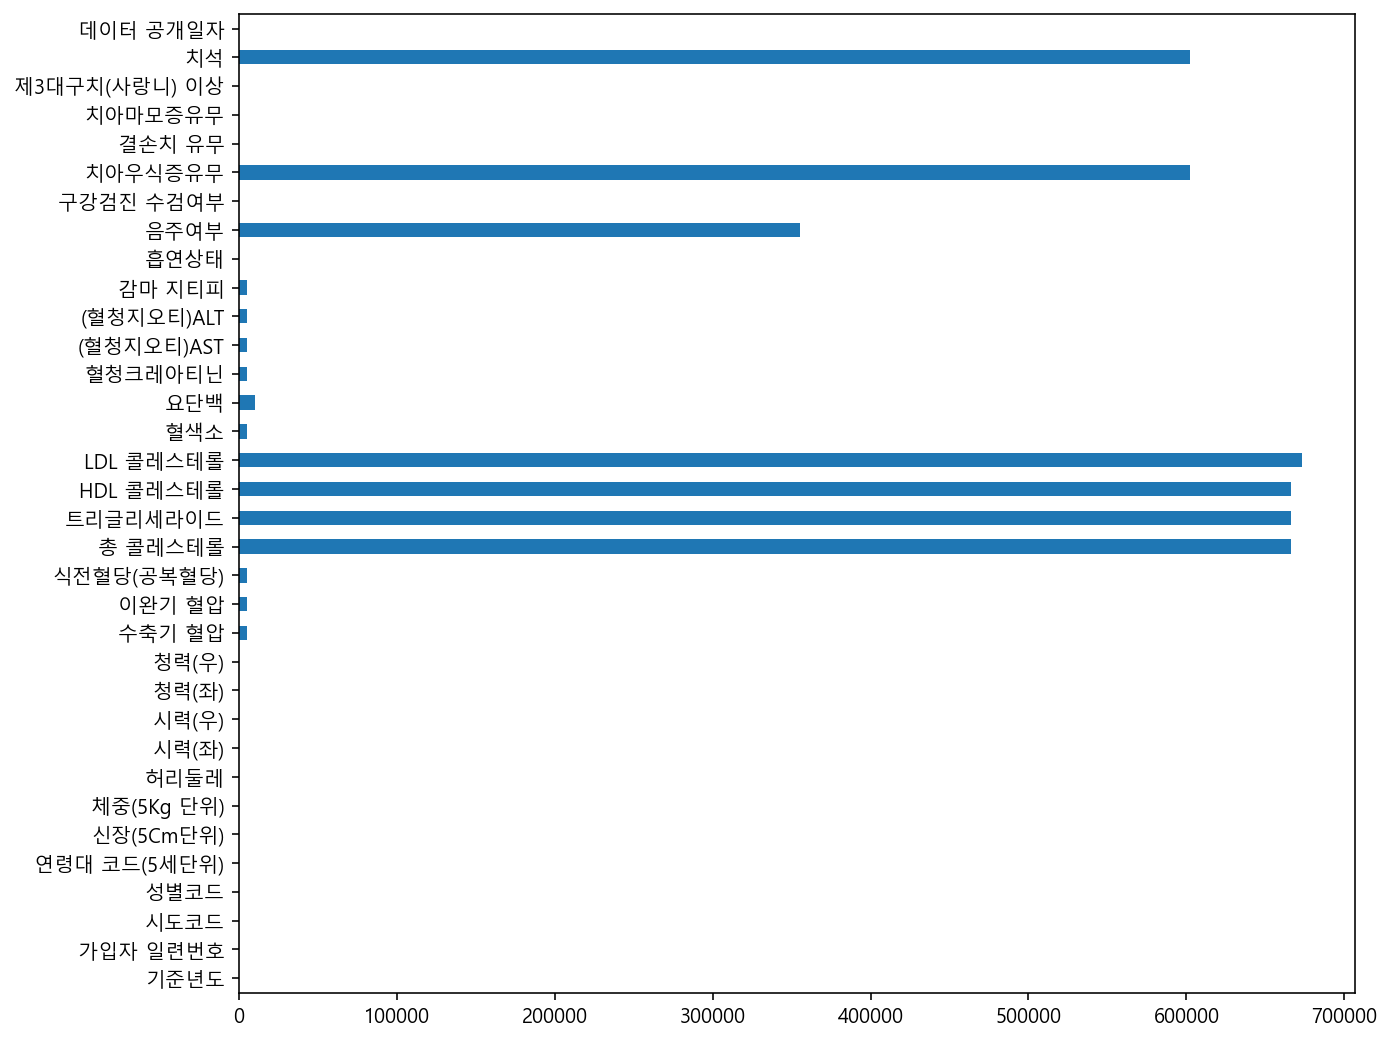

In [13]:
# 판다스에 내장 된 plot을 통해 시각화
df.isnull().sum().plot.barh(figsize=(10,9)) # figsize로 크기 조절

## 8. 일부 데이터 요약하기

In [14]:
#여러 컬럼 가져오기
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기
df[["(혈청지오티)ALT","(혈청지오티)AST" ]]

,(혈청지오티)ALT,(혈청지오티)AST
0,32.0,18.0
1,8.0,15.0
2,21.0,30.0
3,19.0,17.0
4,24.0,19.0
...,...,...
999995,23.0,24.0
999996,15.0,16.0
999997,28.0,23.0
999998,65.0,25.0


In [15]:
df['(혈청지오티)ALT'] # 시리즈 형태

0         32.0
1          8.0
2         21.0
3         19.0
4         24.0
          ... 
999995    23.0
999996    15.0
999997    28.0
999998    65.0
999999    16.0
Name: (혈청지오티)ALT, Length: 1000000, dtype: float64

In [16]:
df[['(혈청지오티)ALT']] # 데이터 프레임 형태

,(혈청지오티)ALT
0,32.0
1,8.0
2,21.0
3,19.0
4,24.0
...,...
999995,23.0
999996,15.0
999997,28.0
999998,65.0


In [17]:
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 요약
df[["(혈청지오티)ALT","(혈청지오티)AST" ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  994477 non-null  float64
 1   (혈청지오티)AST  994478 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [18]:
df[["(혈청지오티)ALT","(혈청지오티)AST" ]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994477.000000,994478.000000
mean,25.996708,26.231107
std,27.710895,24.046478
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,7362.000000


## 9. value_counts 로 값 집계하기

In [19]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계
df['성별코드'].value_counts()

1    519574
2    480426
Name: 성별코드, dtype: int64

In [20]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계
df['흡연상태'].value_counts()

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

## 10. groupby와 pivot_table 사용하기

### 10.1 groupby

In [21]:
# groupby를 통해 데이터를 그룹화
# 성별코드로 그룹화 한 데이터를 세어 본다.
# 성별로 그룹화 해서 가입자 일련번호를 구분해 세어본다.
df.groupby(['성별코드'])['가입자 일련번호'].count()

성별코드
1    519574
2    480426
Name: 가입자 일련번호, dtype: int64

In [22]:
# 성별코드와 음주여부로 그룹화를 하고 갯수 세어 본다
# 1: 남성, 2: 여성,  0:음주 x, 1: 음주 o
df.groupby(['성별코드','음주여부'])['가입자 일련번호'].count()

성별코드  음주여부
1     0.0          7
      1.0     401249
2     0.0         11
      1.0     243651
Name: 가입자 일련번호, dtype: int64

In [23]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균 구하기
df.groupby(['성별코드','음주여부'])['감마 지티피'].mean()

성별코드  음주여부
1     0.0     26.000000
      1.0     52.159757
2     0.0     27.000000
      1.0     23.565117
Name: 감마 지티피, dtype: float64

In [24]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구하기
# max = 999 라는 이상값이 있음
df.groupby(['성별코드','음주여부'])['감마 지티피'].describe()

count       mean        std   min   25%   50%   75%    max
성별코드 음주여부                                                               
1    0.0        7.0  26.000000  12.897028  10.0  18.5  21.0  34.0   46.0
     1.0   400496.0  52.159757  62.807391   1.0  22.0  34.0  58.0  999.0
2    0.0       11.0  27.000000  15.968719   5.0  16.5  20.0  40.5   53.0
     1.0   243215.0  23.565117  31.881879   1.0  13.0  16.0  24.0  999.0

In [25]:
# agg을 사용하면 여러 수치를 함께 구할 수 있다.
# 999라는 이상값 때문에 평균값이 중간값보다 더 max값에 편향되있다
df.groupby(['성별코드','음주여부'])['감마 지티피'].agg(
    ['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0        7  26.000000    21.0
     1.0   400496  52.159757    34.0
2    0.0       11  27.000000    20.0
     1.0   243215  23.565117    16.0

### 10.2 pivot_table

In [26]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구한다.
df.pivot_table(index='음주여부',values='가입자 일련번호', aggfunc='count')

,가입자 일련번호
음주여부,
0.0,18
1.0,644900


In [27]:
# 음주여부에 따른 감마지티피의 평균을 구한다.
# 판다스의 pd.pivot은 연산 X
pd.pivot_table(df, index='음주여부',values='감마 지티피')

,감마 지티피
음주여부,
0.0,26.611111
1.0,41.355770


In [28]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정
pd.pivot_table(df, index='음주여부',values='감마 지티피',aggfunc='mean')
# 기본적으로 aggfunc값은 mean이다

,감마 지티피
음주여부,
0.0,26.611111
1.0,41.355770


In [29]:
# aggfunc에 여러 값을 한번에 지정
pd.pivot_table(df, index='음주여부',values='감마 지티피',aggfunc=['mean','median'])
#aggfunc값을 리스트로 여러개를 설정하면 비교가능하다 (주로 연봉 비교에 사용)

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,26.611111,20.5
1.0,41.355770,26.0


In [30]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있다.
pd.pivot_table(df, index=['음주여부'],values='감마 지티피',aggfunc='describe')


,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,17.25,20.5,39.5,18.0,53.0,26.611111,5.0,14.455363
1.0,17.00,26.0,45.0,643711.0,999.0,41.355770,1.0,55.050548


In [31]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구한다.
pd.pivot_table(df, index=['성별코드','음주여부'],values='감마 지티피',aggfunc='describe')


25%   50%   75%     count    max       mean   min        std
성별코드 음주여부                                                               
1    0.0   18.5  21.0  34.0       7.0   46.0  26.000000  10.0  12.897028
     1.0   22.0  34.0  58.0  400496.0  999.0  52.159757   1.0  62.807391
2    0.0   16.5  20.0  40.5      11.0   53.0  27.000000   5.0  15.968719
     1.0   13.0  16.0  24.0  243215.0  999.0  23.565117   1.0  31.881879

## 11. 전체 데이터 시각화 하기

### ● 100만개가 넘는 데이터를 시각화할 때는 되도록 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장한다.
### ● 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수가 있다.

### 11.1 히스토그램
#### ● 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인
#### ● 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 한다.
#### ● 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그린다.


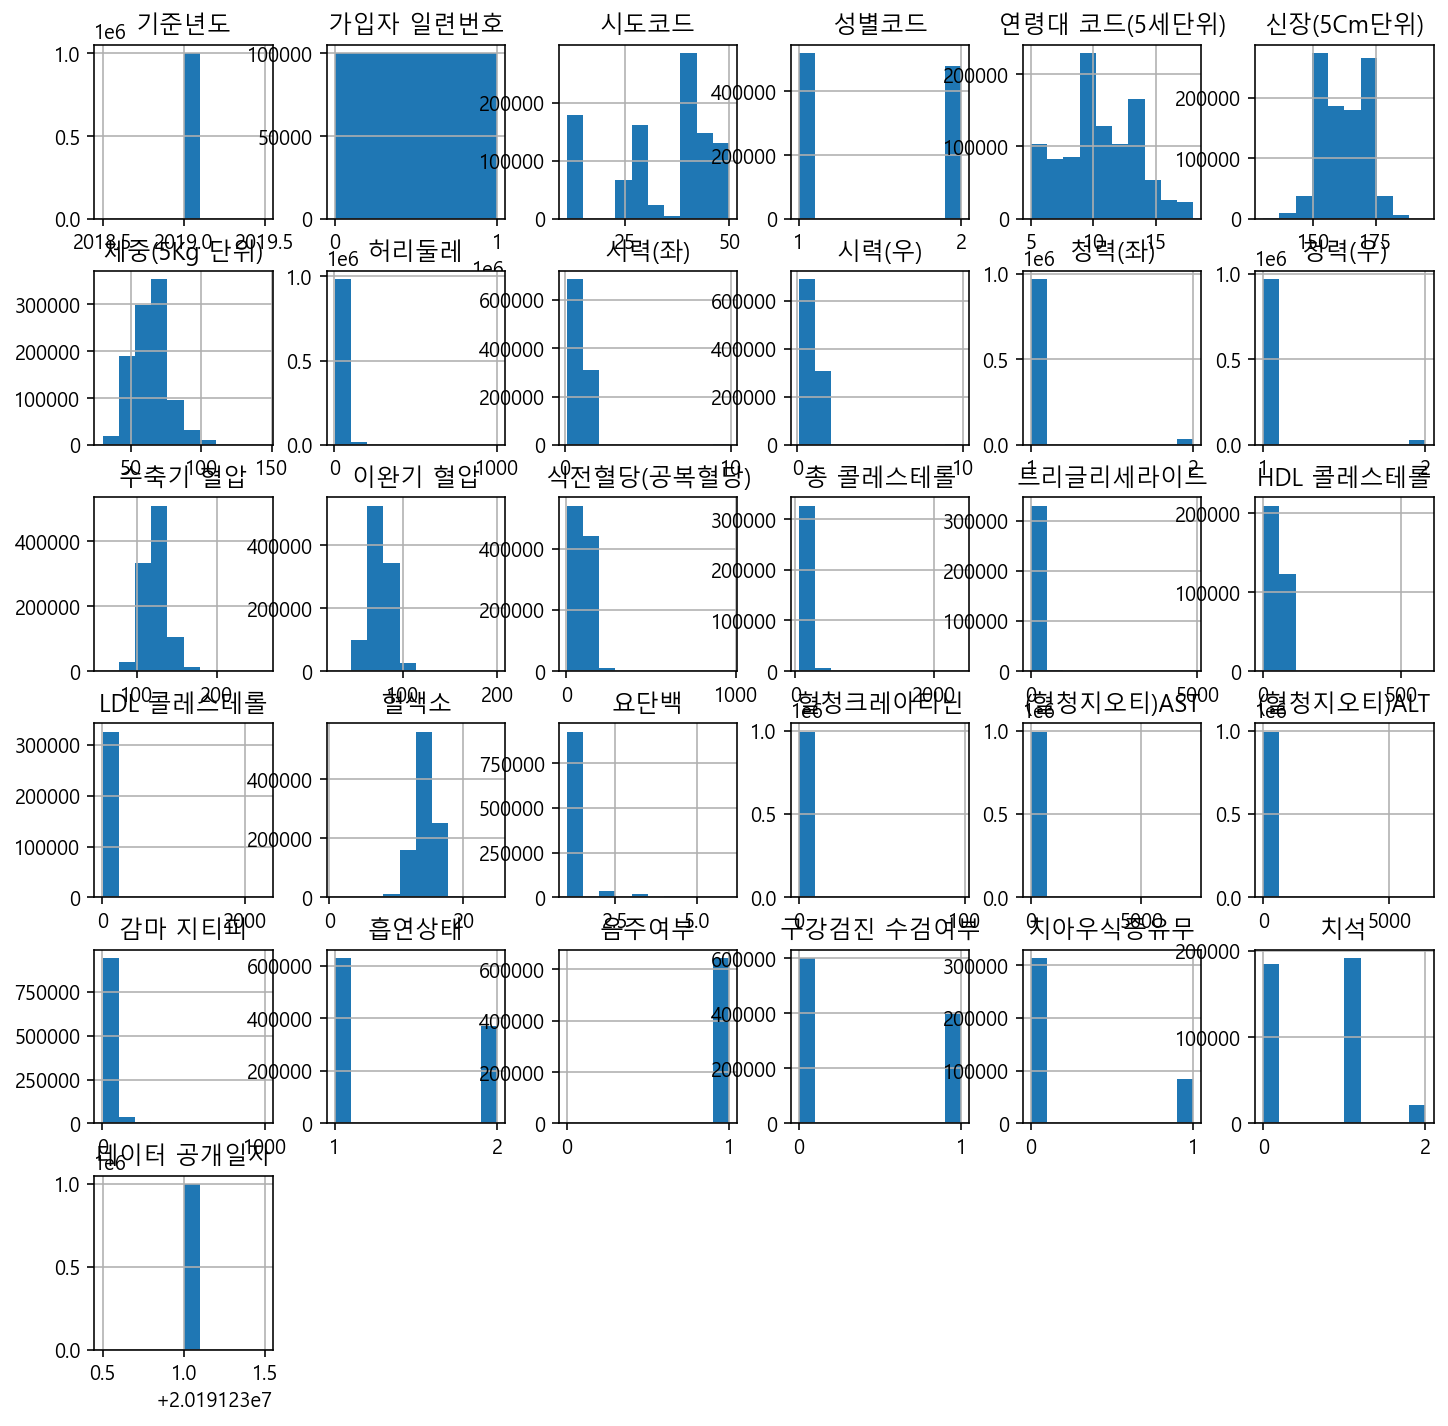

In [32]:
# 전체 데이터에 대한 히스토그램을 출력한다.
h = df.hist(figsize=(12,12)) #변수에다 할당하면 출력되는 데이터가 없이 빠르게 출력된다.

### 11.2 슬라이싱을 사용해 히스토그램 그리기
#### ●슬라이싱 기능을 사용해서 데이터를 나누어 그린다.
#### ●슬라이싱 사용시  iloc를 활용하면 인덱스의 순서대로 슬라이싱 가능
#### ● iloc[행,열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [: , :]을 사용한다.
#### ● 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있다.

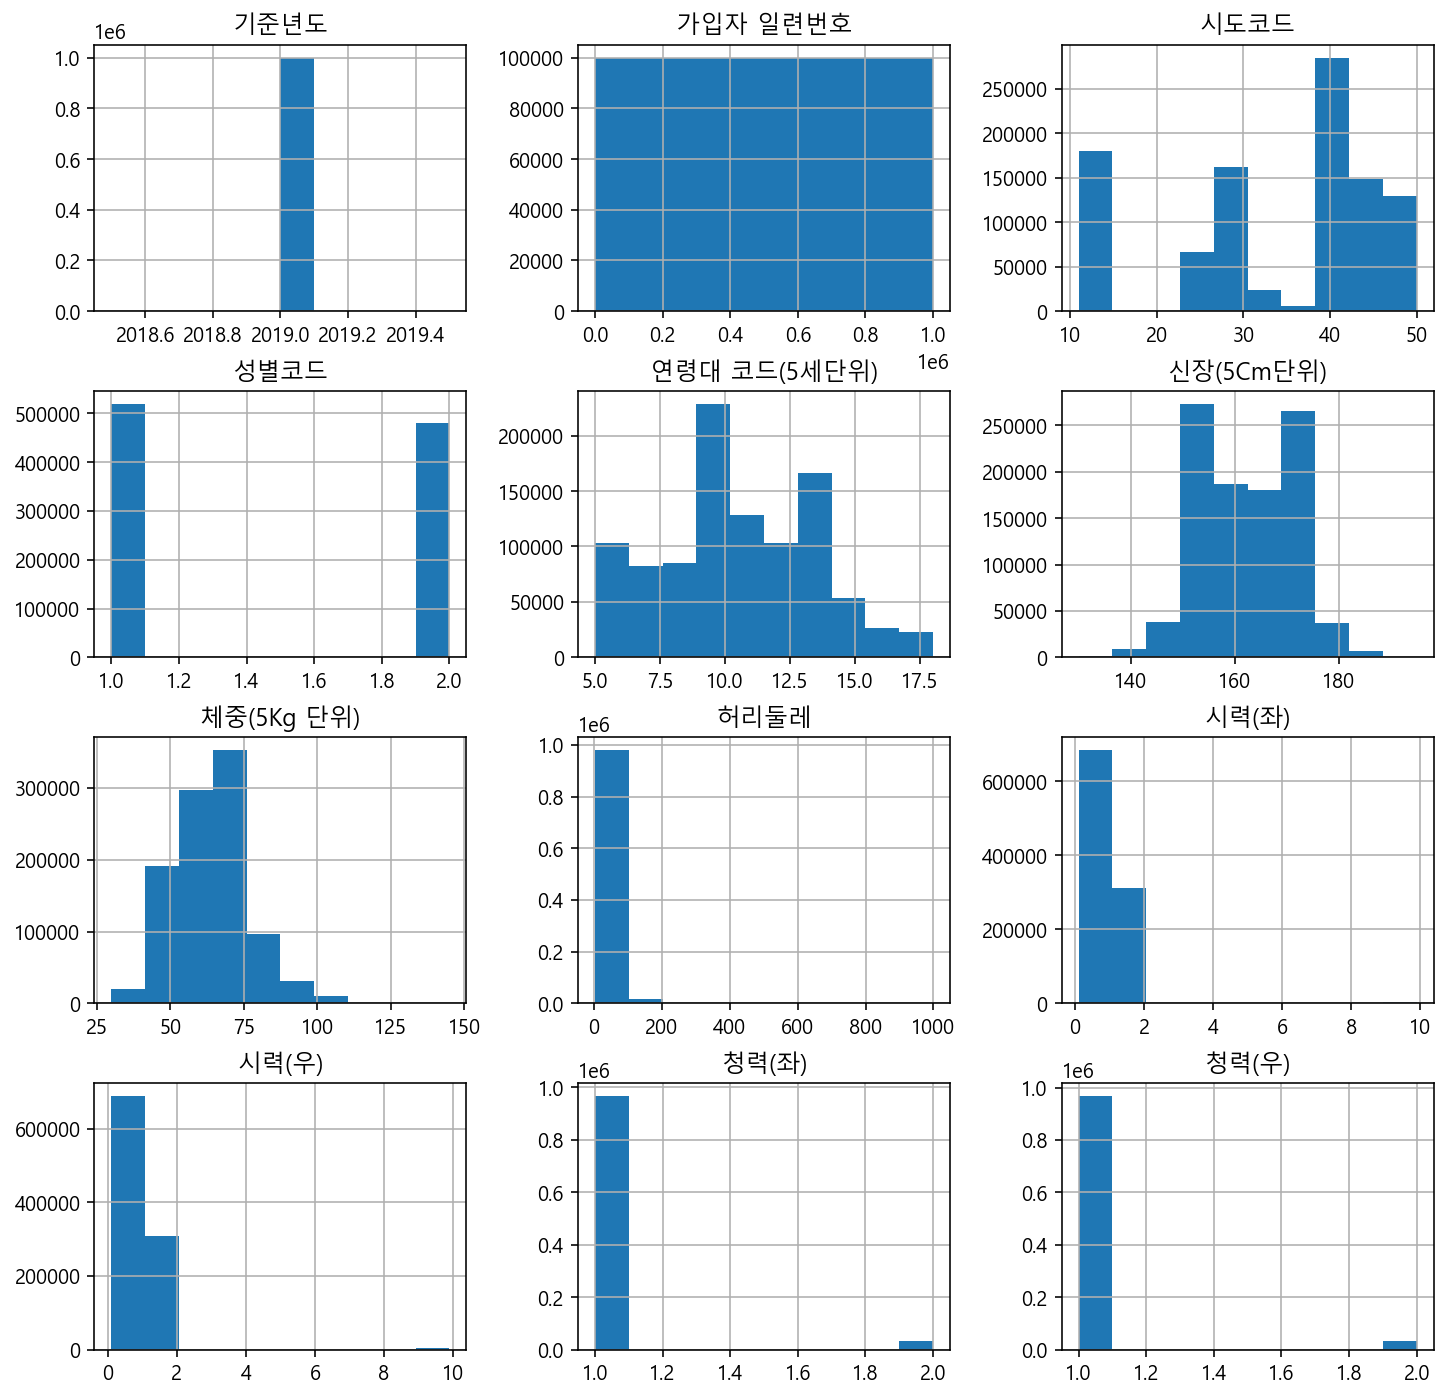

In [33]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스터그램을 그린다
#[행,열]
h = df.iloc[:,:12].hist(figsize=(12,12))

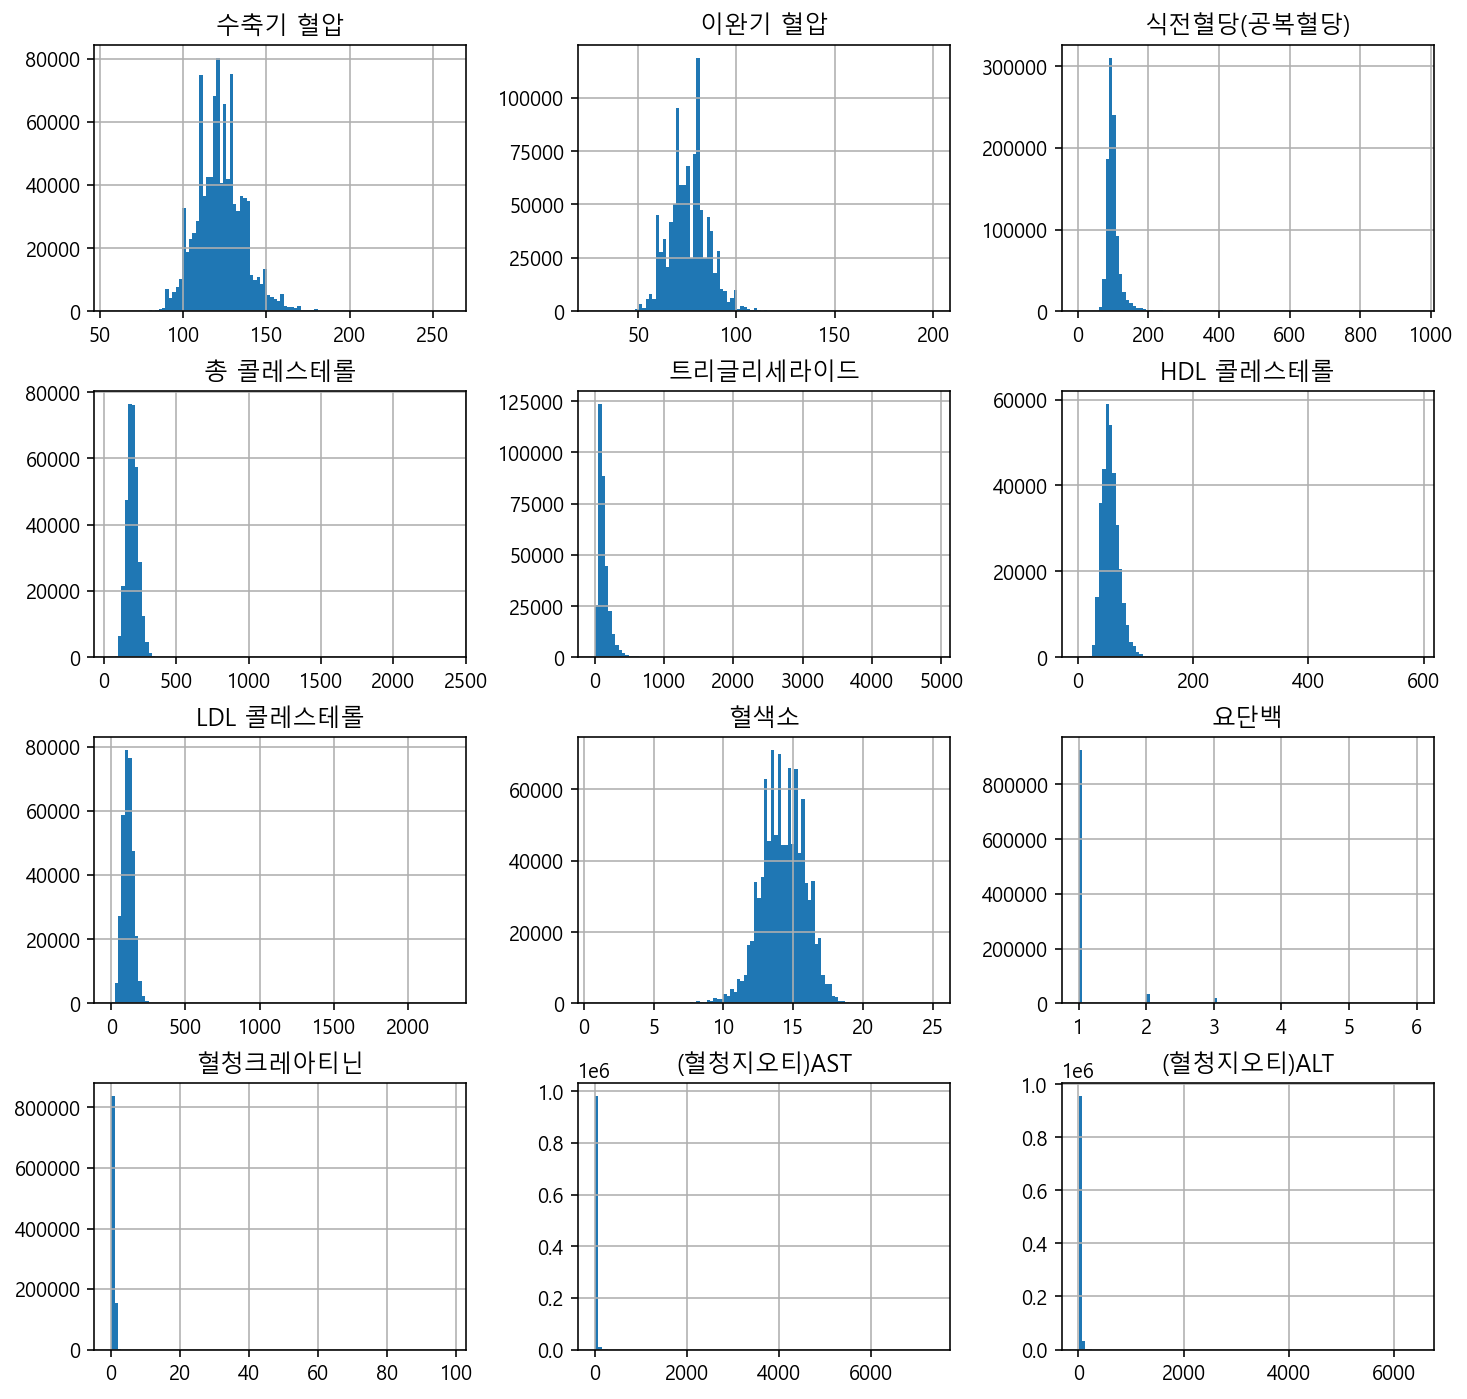

In [34]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그린다.
h = df.iloc[:,12:24].hist(figsize=(12,12),bins=100)

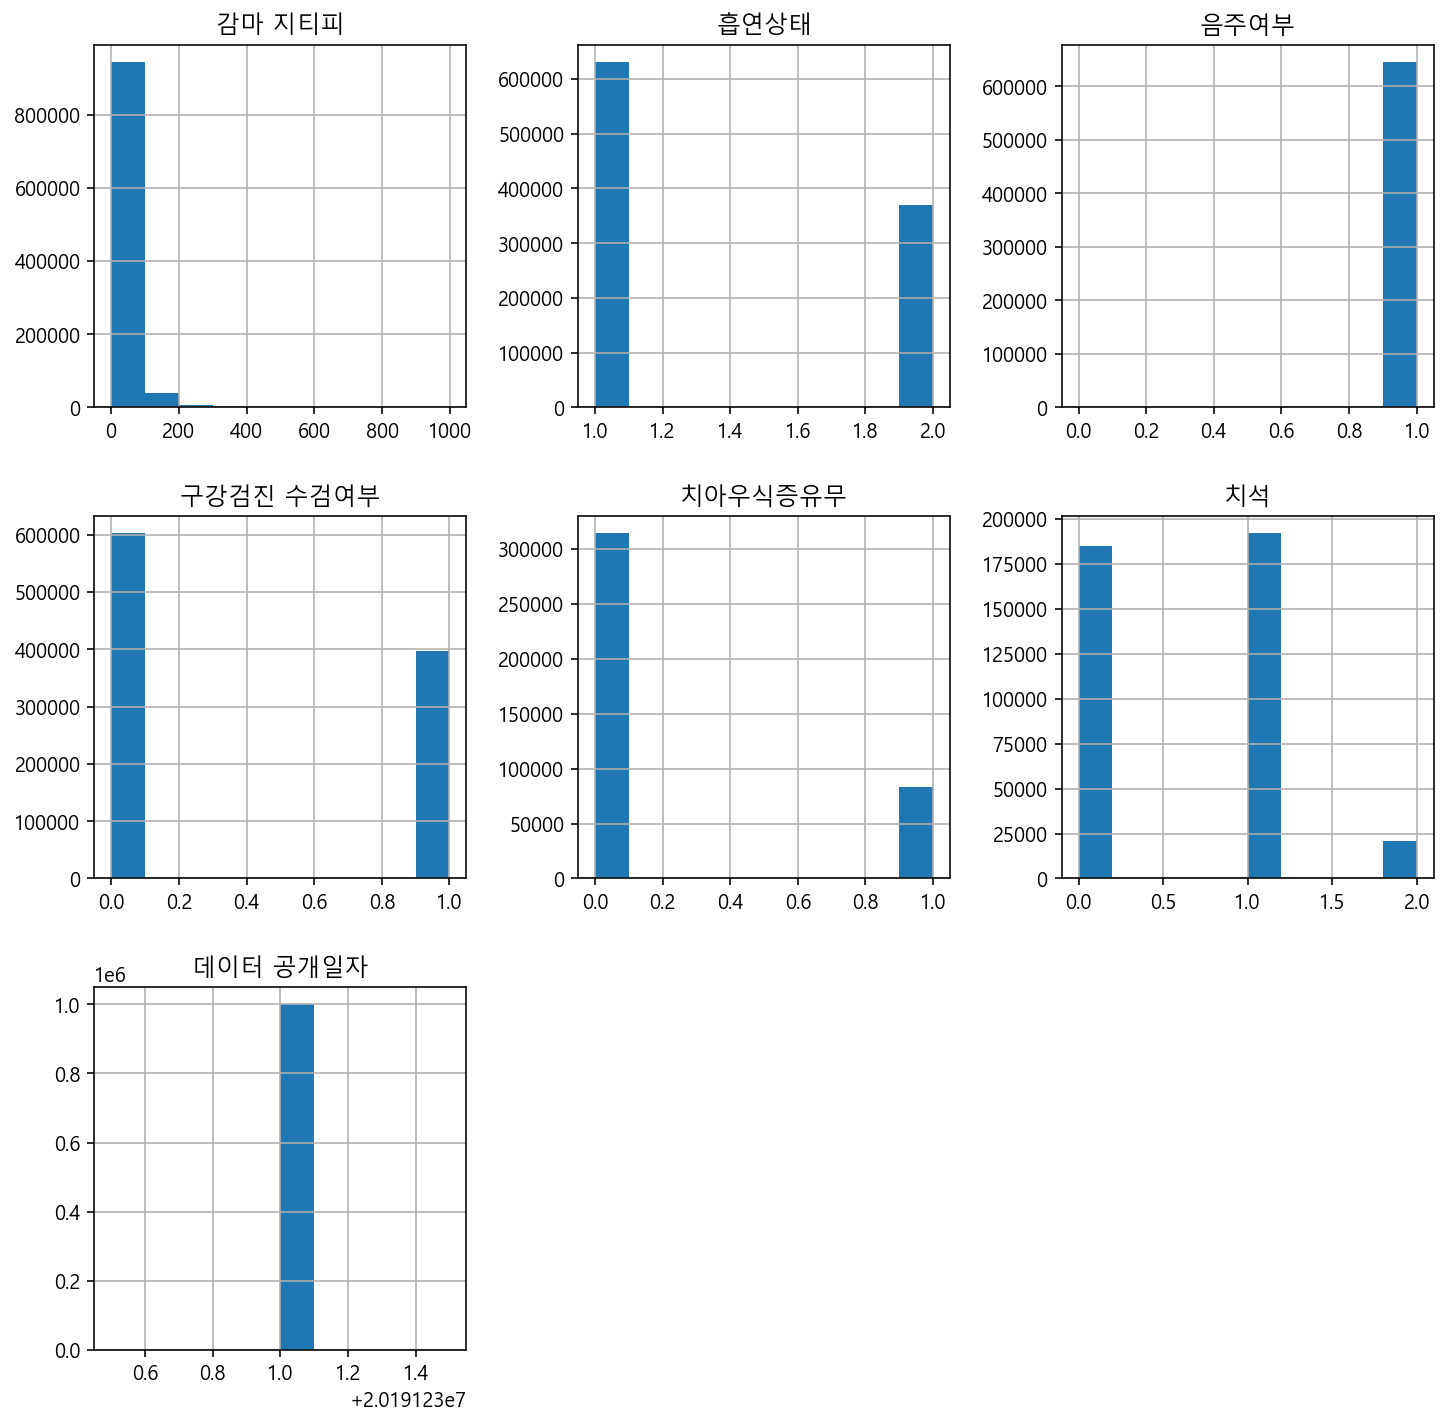

In [35]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그린다.
h = df.iloc[:,24:].hist(figsize=(12,12))

## 12. 샘플데이터 추출하기

#### ●seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸린다.
#### ● 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용

In [36]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출한다.
# random_state를 사용해 샘플링되는 값을 고정할 수 있다.
# 실험을 통제하기 위해 random_state를 고정하기도 한다.
#
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## 13. 데이터 시각화 도구 Seaborn 사용하기

## 14. 범주형(카테고리) 데이터 시각화
#### ●countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
#### ●value_counts 로 구한 값을 시각화

### ●14.1 countplot - 음주여부

<AxesSubplot:>

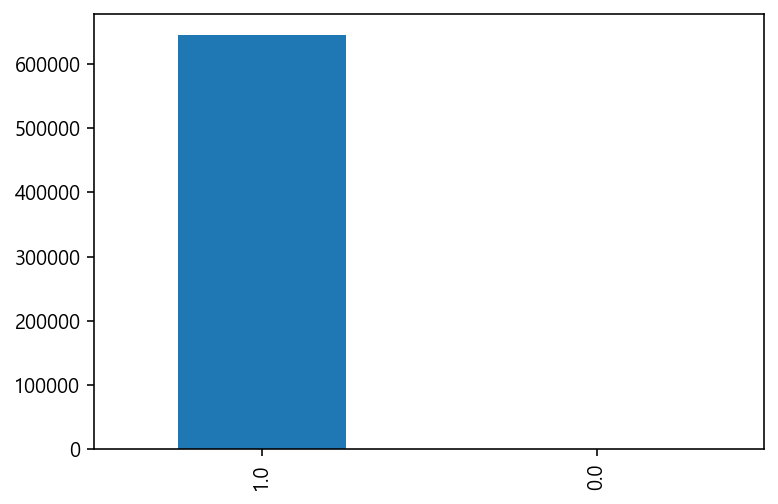

In [40]:
# 음주여부에 따른 countplot을 그린다.
df['음주여부'].value_counts().plot.bar()
# 판다스로 시각화 할때는 연산을 하고 시각화

<AxesSubplot:xlabel='음주여부', ylabel='count'>

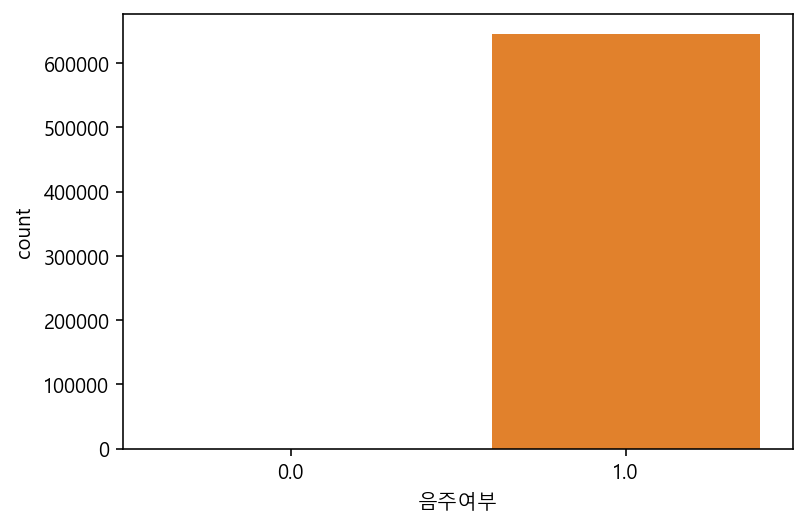

In [41]:
# seaborn으로 시각화 할 때는 연산 X, 알아서 수행
sns.countplot(x='음주여부', data=df)

<AxesSubplot:xlabel='성별코드', ylabel='count'>

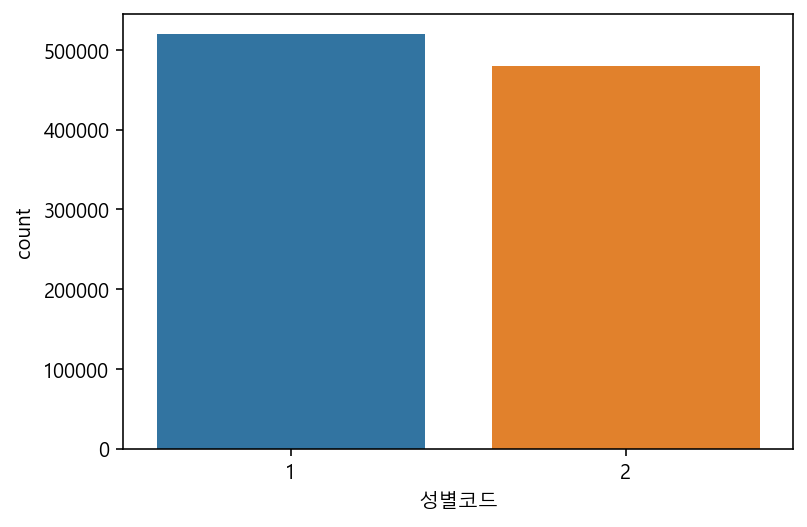

In [43]:
sns.countplot(x='성별코드', data=df)

### ●14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

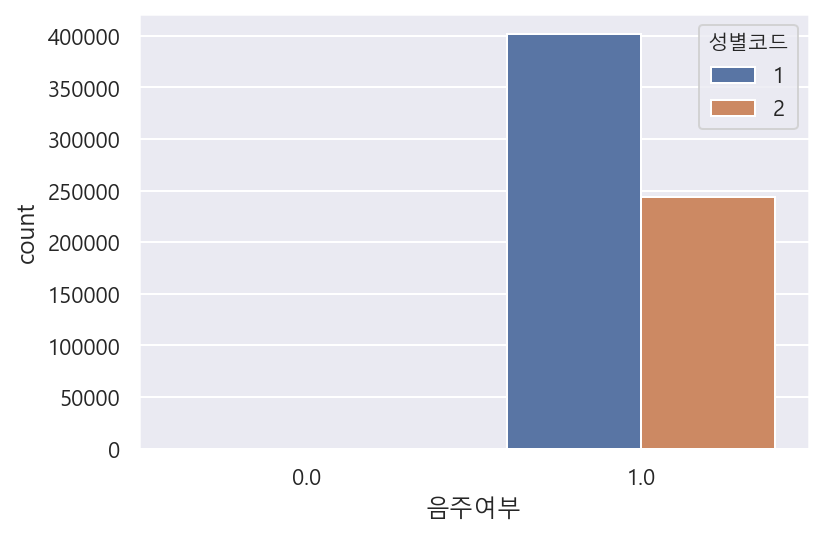

In [49]:
# 음주여부에 따른 countplot을 그리고 hue 를 사용해 성별코드로 색상을 구분해 그린다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 된다. 색상을 의미
# 또, seaborn 에서 제공하는 폰트 설정을 사용할 수도 있다.
# 다만, 이때 seaborn 의 기본스타일이 적용되는 것을 확인해 주는 것이 좋다
# Window
sns.set(font_scale=1, font='Malgun Gothic')
sns.countplot(data=df, x='음주여부', hue='성별코드')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

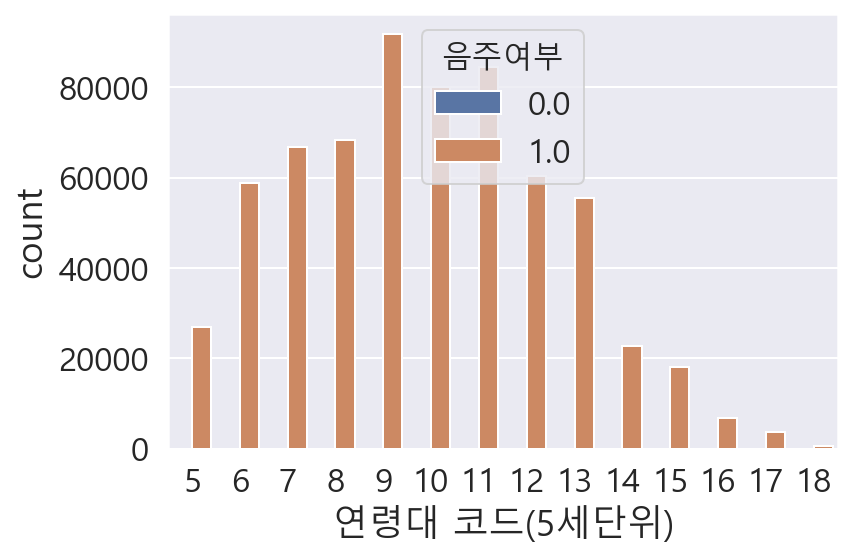

In [48]:
# countplot으로 연령대별 음주여부를 본다
# hue를 사용해 다른 색상으로 표현한다.
sns.countplot(data=df, x='연령대 코드(5세단위)',hue='음주여부')

### 14.3 countplot - 키와 몸무게
#### ● 키와 몸무게는 연속형 데이터
#### ● 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있다.
#### ● 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라 본다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

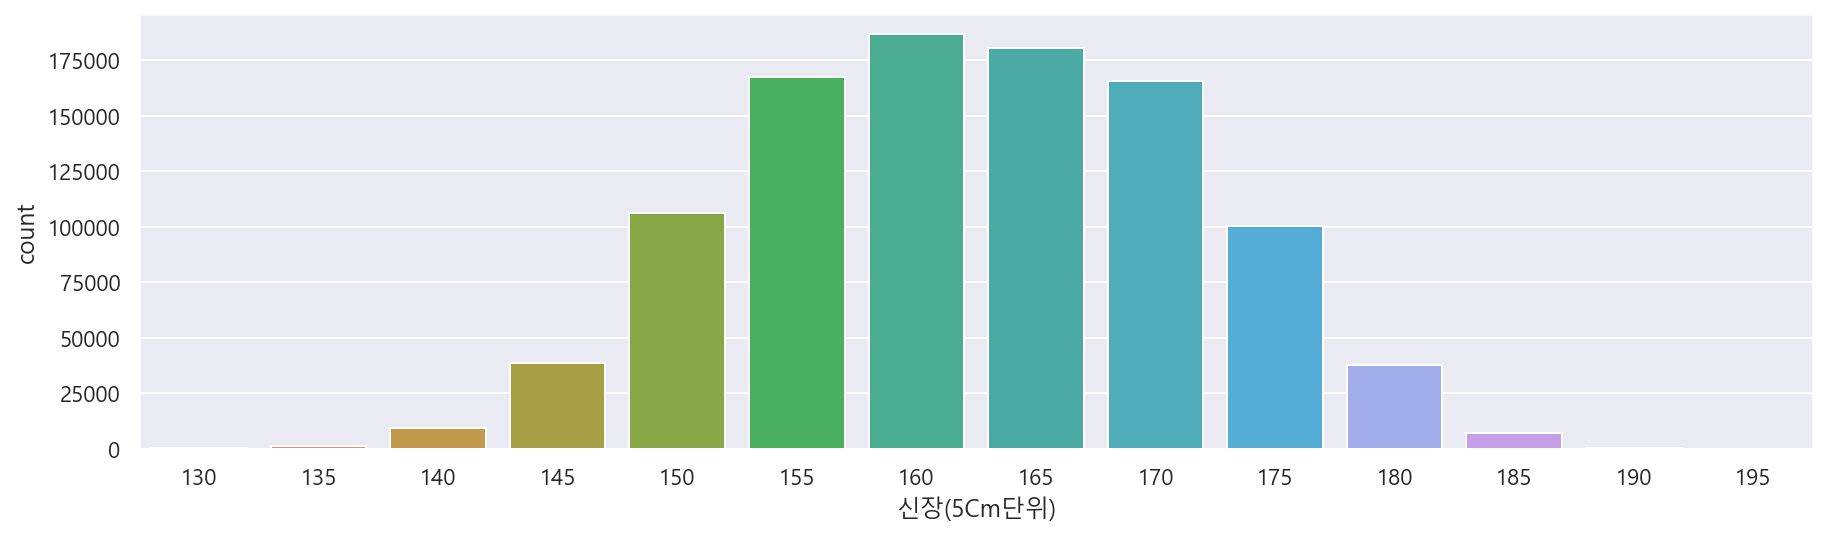

In [53]:
# countplot으로 키를 본다
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='신장(5Cm단위)')

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

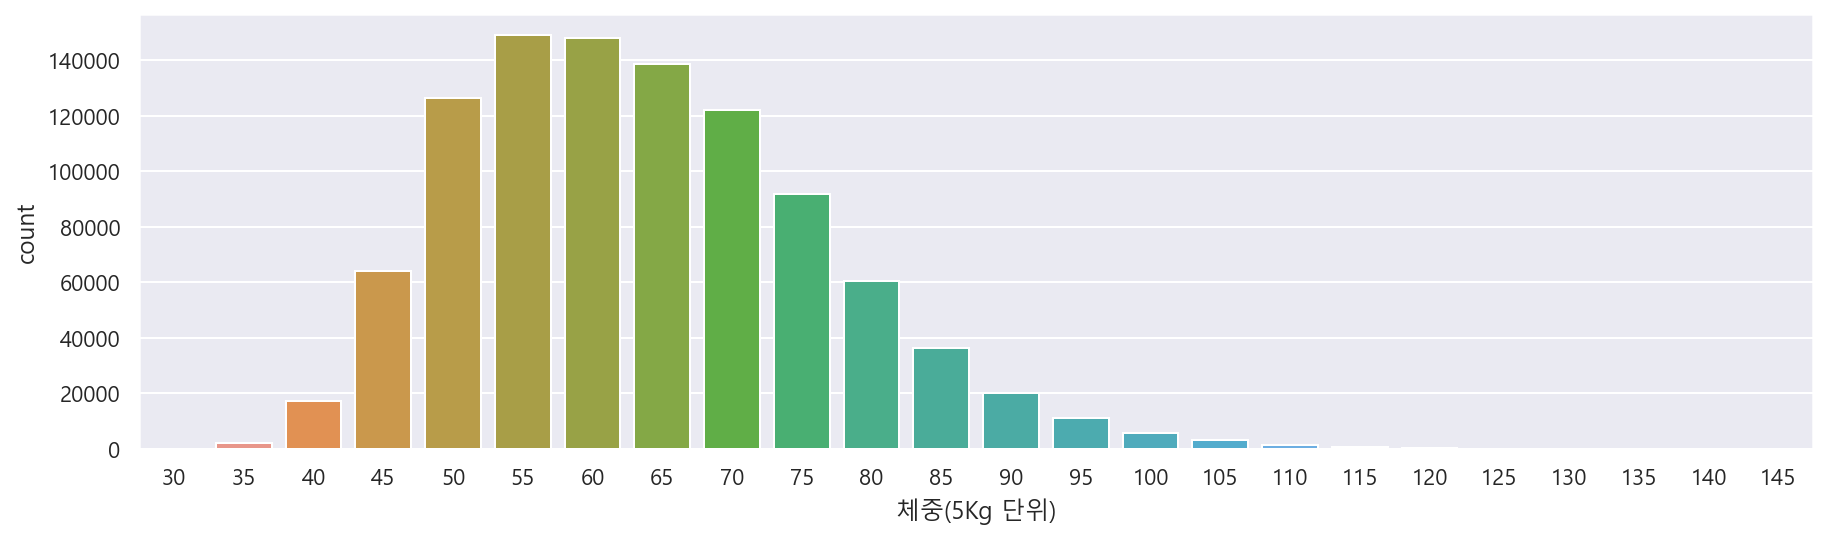

In [55]:
# countplot으로 체중을 본다
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='체중(5Kg 단위)')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

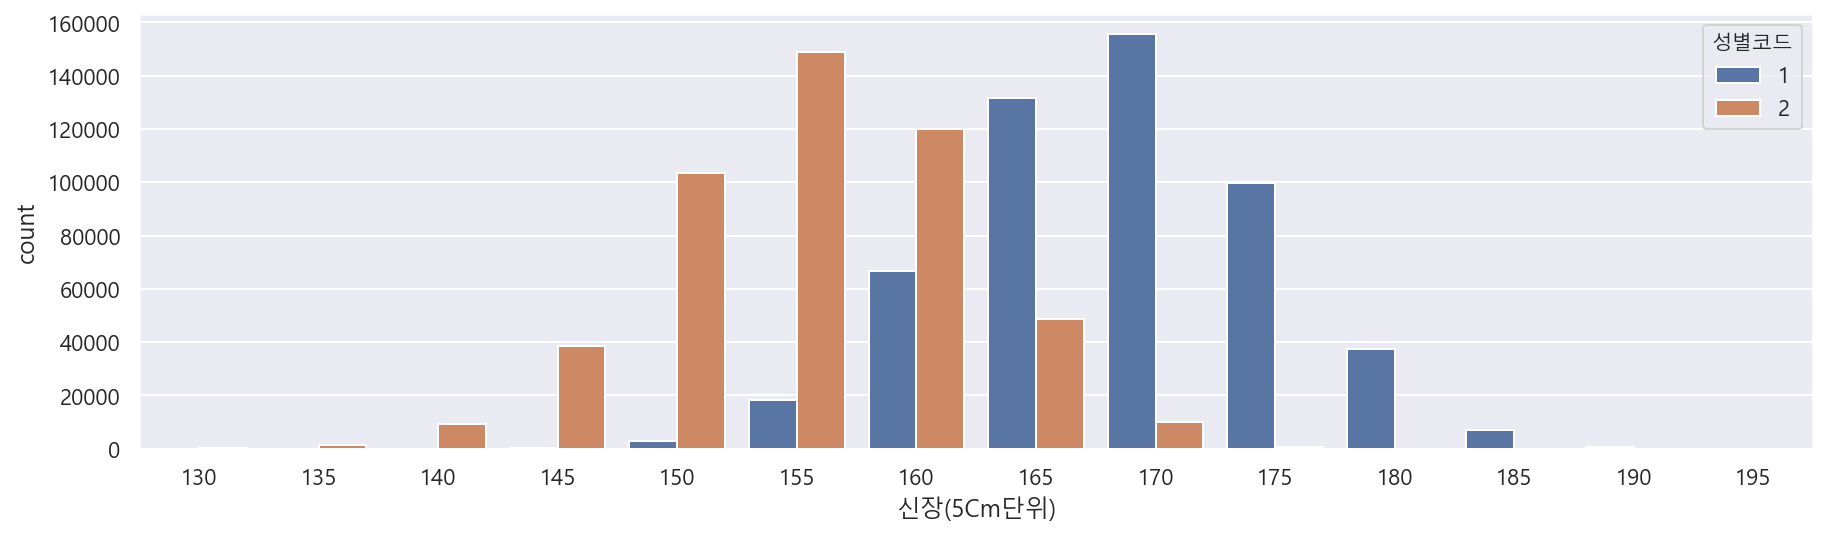

In [56]:
# countplot으로 신장(5Cm단위)를 본다.
# 성별에 따른 키의 차이를 본다

plt.figure(figsize=(15,4))
sns.countplot(data=df, x='신장(5Cm단위)',hue='성별코드')

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

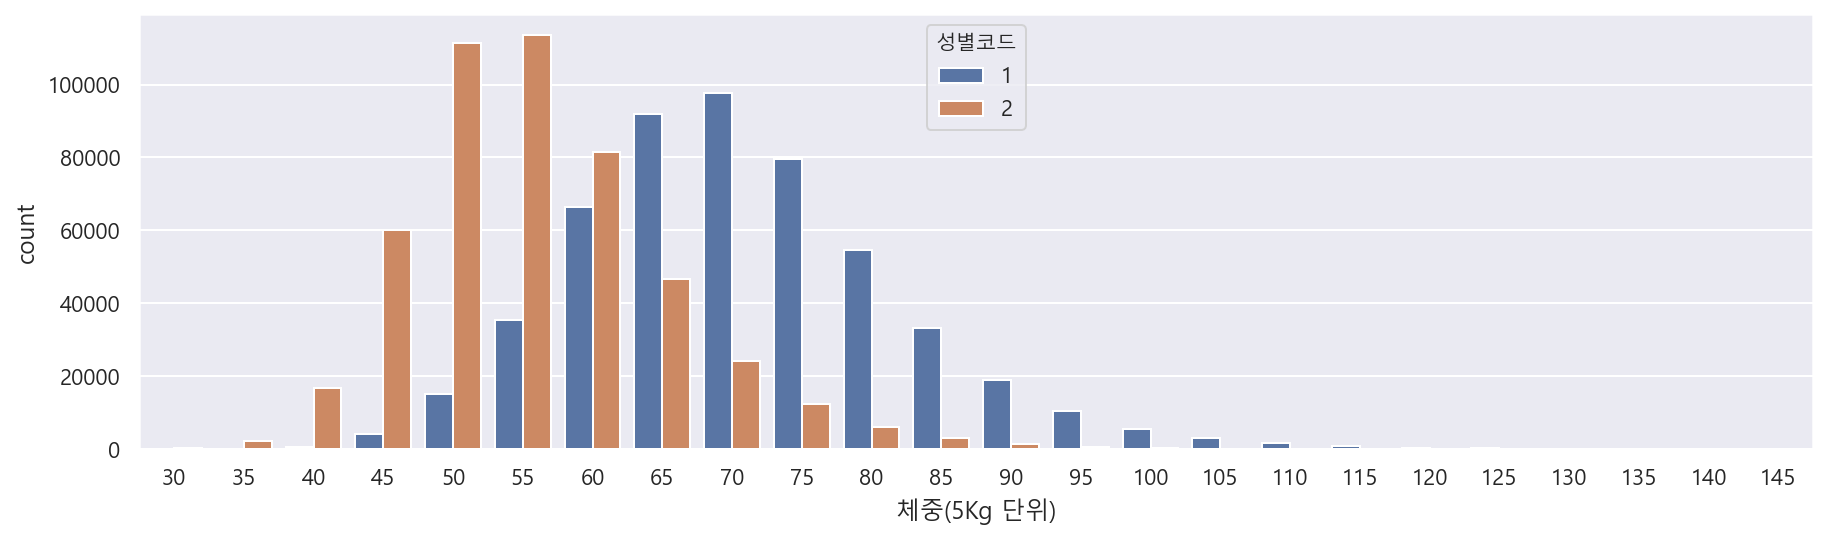

In [58]:
# 성별에 따른 체중의 차이를 본다
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='체중(5Kg 단위)',hue='성별코드')

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

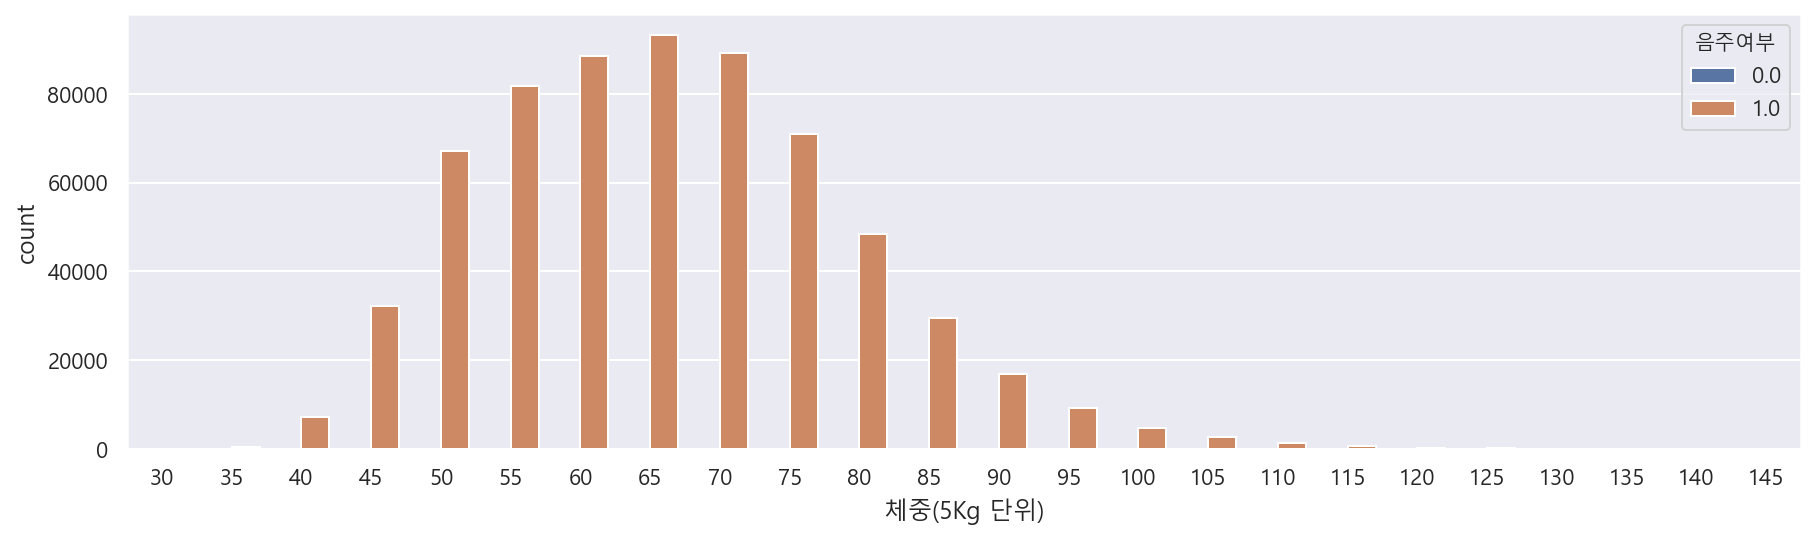

In [59]:
# 음주여부에 따른 체중의 차이를 본다
# 음주를 하는 사람일 수록 몸무게가 더 나간다.
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='체중(5Kg 단위)',hue='음주여부')

### 14.4 barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

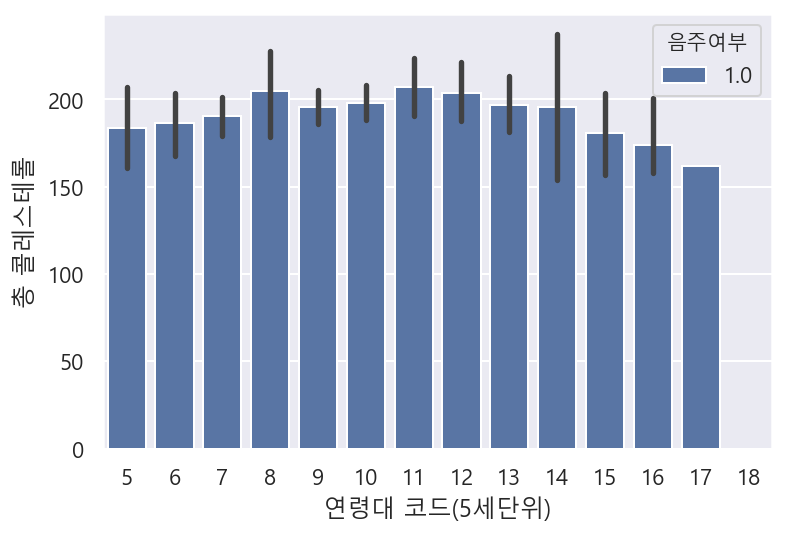

In [70]:
# 연령대코드와 총 콜레스테롤을 본다.
# hue로 색상을 다르게 표현할 수 있다. 음주여부를 함께 본다.
# countplot 과 다르게 barplot은 오래 걸린다.
sns.barplot(data=df_sample, x='연령대 코드(5세단위)', y='총 콜레스테롤',hue='음주여부')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

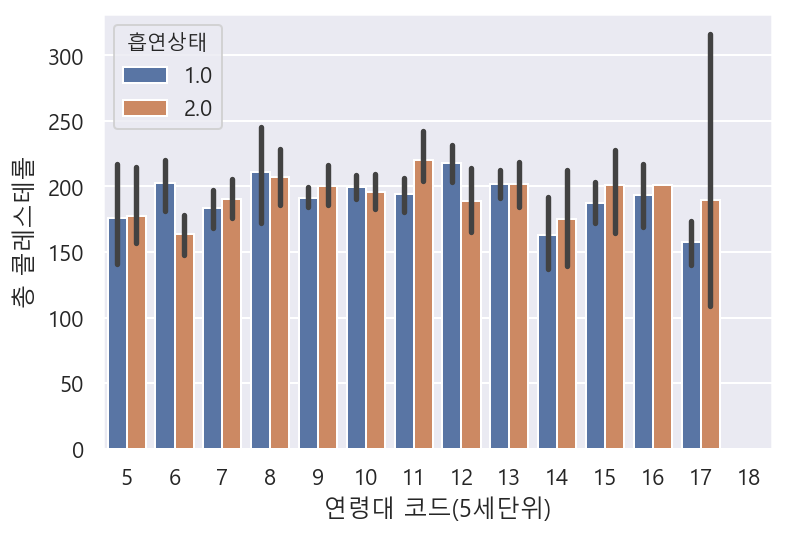

In [71]:
# 연령대코드와 총 콜레스테롤을 본다
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그린다
# 
sns.barplot(data=df_sample, x='연령대 코드(5세단위)', y='총 콜레스테롤',hue='흡연상태')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

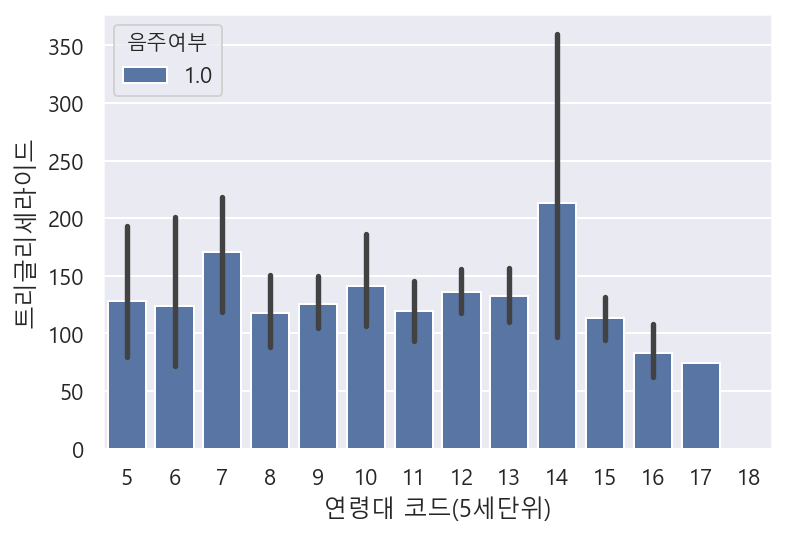

In [73]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그린다.
sns.barplot(data=df_sample, x='연령대 코드(5세단위)',y='트리글리세라이드', hue='음주여부')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

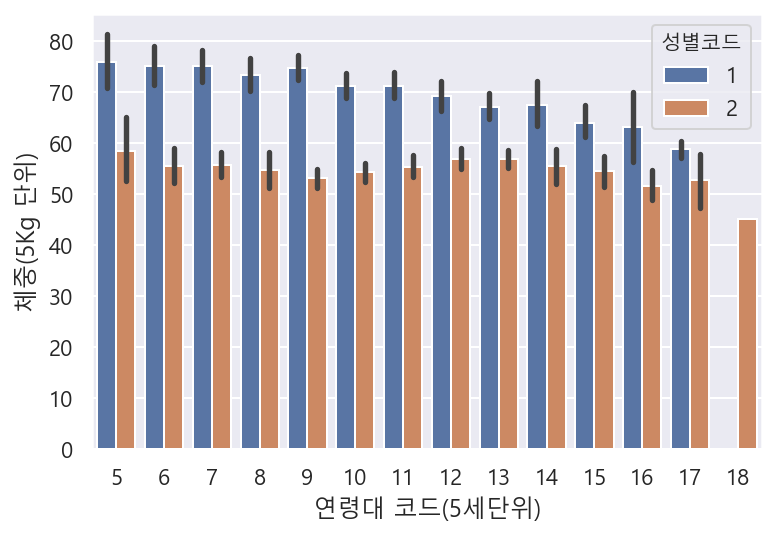

In [75]:
# 연령대코드와 체중(5Kg 단위)을 성별에 따라 본다.
sns.barplot(data=df_sample, x='연령대 코드(5세단위)',y='체중(5Kg 단위)', hue='성별코드')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

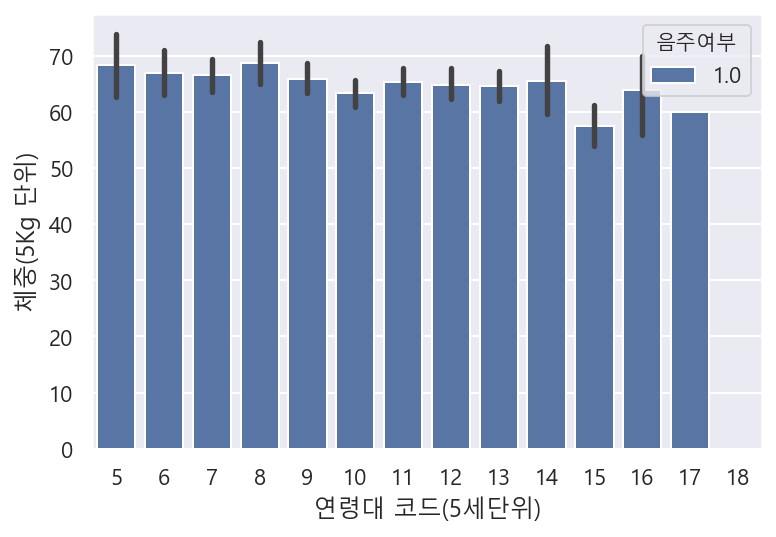

In [76]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위)을 음주여부에 따라 barplot으로 그린다.
sns.barplot(data=df_sample, x='연령대 코드(5세단위)',y='체중(5Kg 단위)', hue='음주여부')

### 14.5 lineplot and pointplot 

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

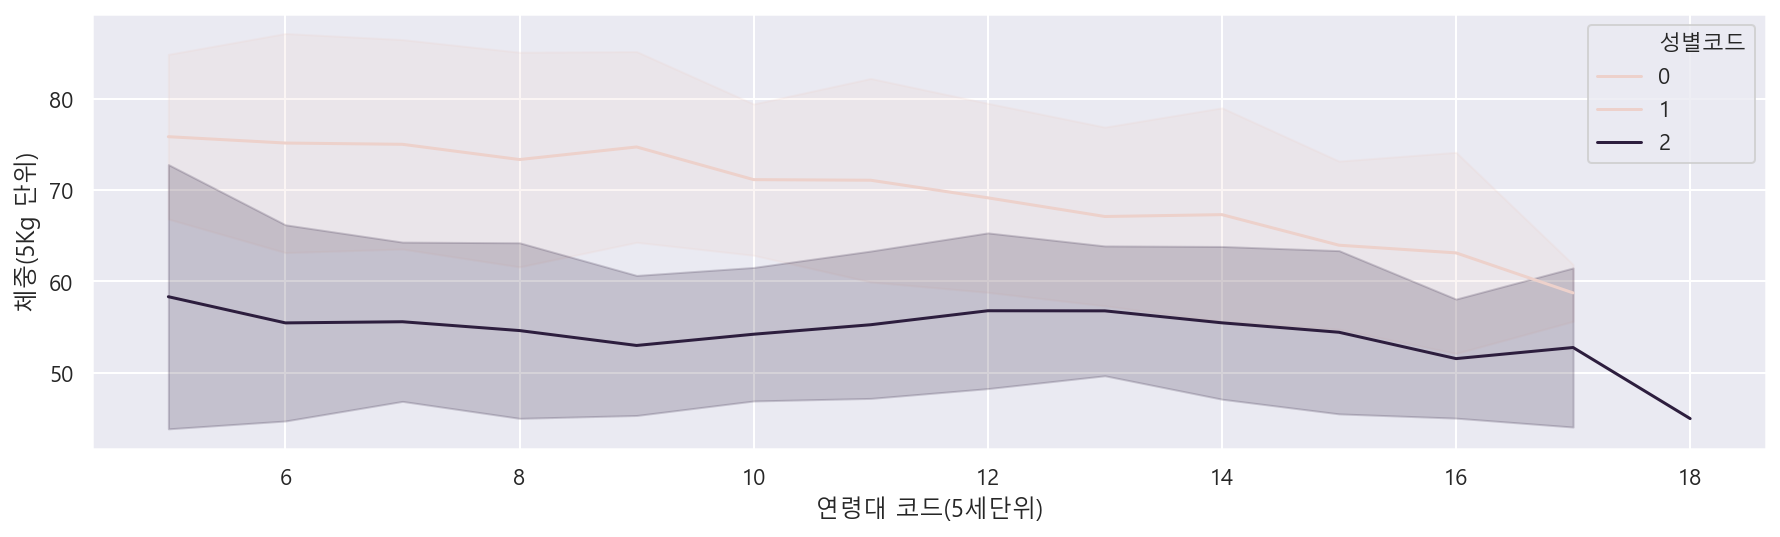

In [85]:
# 연령대코드 (5세단위) 에 따른 체중(5Kg 단위) 을 성별코드에 따라 lineplot으로 그린다
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x='연령대 코드(5세단위)',y='체중(5Kg 단위)', hue='성별코드',ci='sd')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

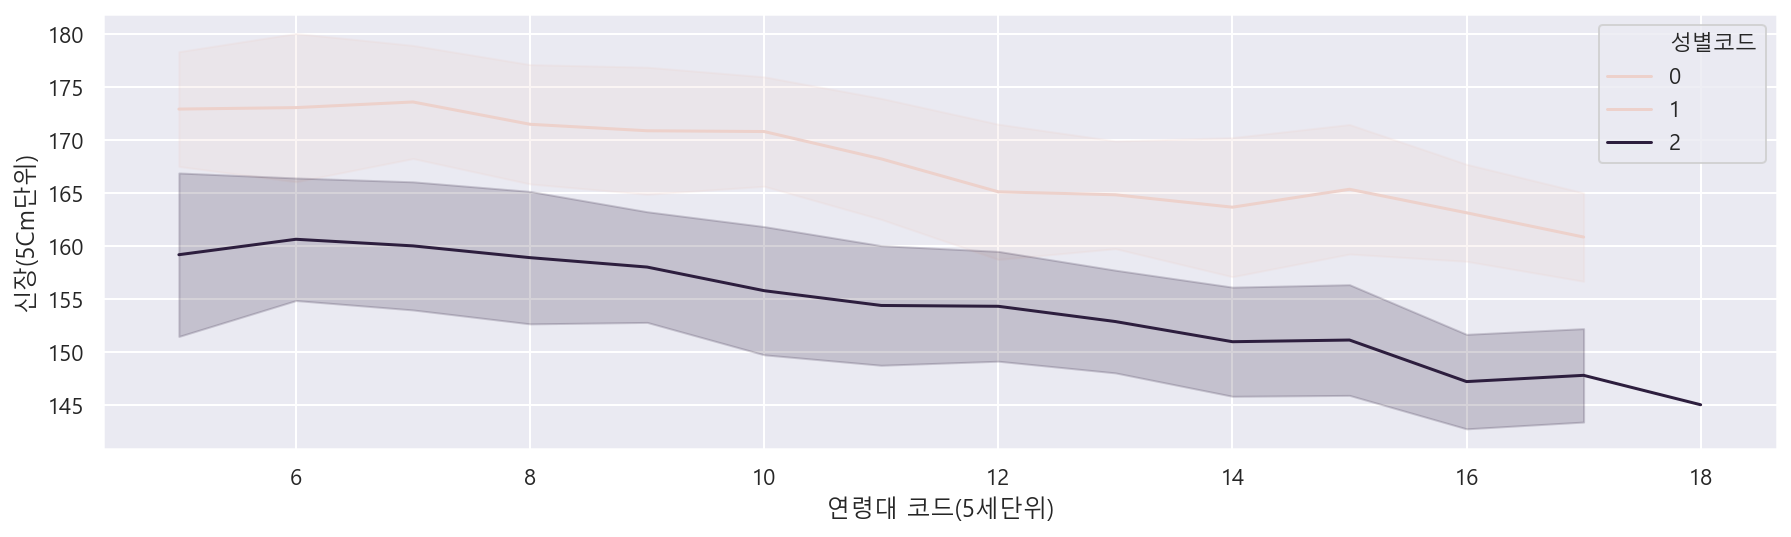

In [86]:
# 연령대코드 (5세단위) 에 따른 신장(5Cm 단위) 을 성별코드에 따라 lineplot으로 그린다
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x='연령대 코드(5세단위)',y='신장(5Cm단위)', hue='성별코드',ci='sd')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

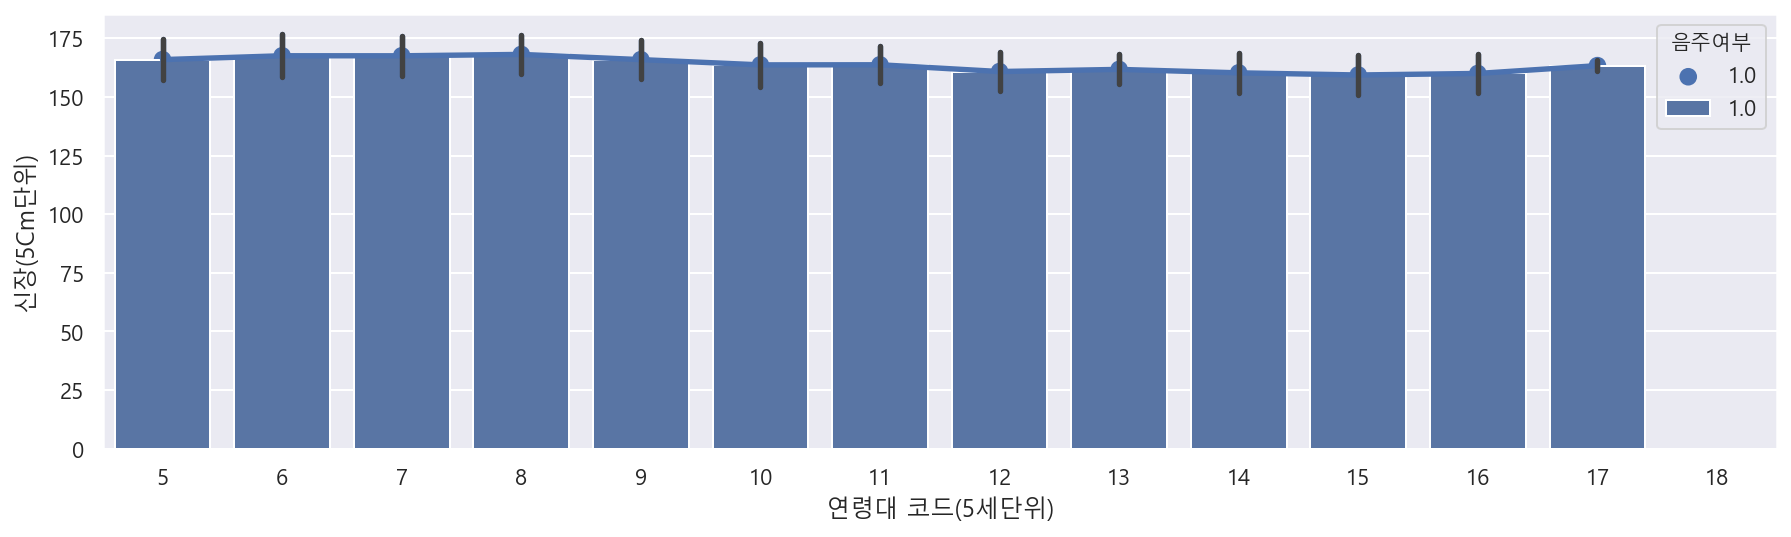

In [89]:
#  연령대코드 (5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 pointplot과 barplot으로 그린다
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x='연령대 코드(5세단위)',y='신장(5Cm단위)', hue='음주여부',ci='sd')
sns.pointplot(data=df_sample, x='연령대 코드(5세단위)',y='신장(5Cm단위)', hue='음주여부',ci='sd')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

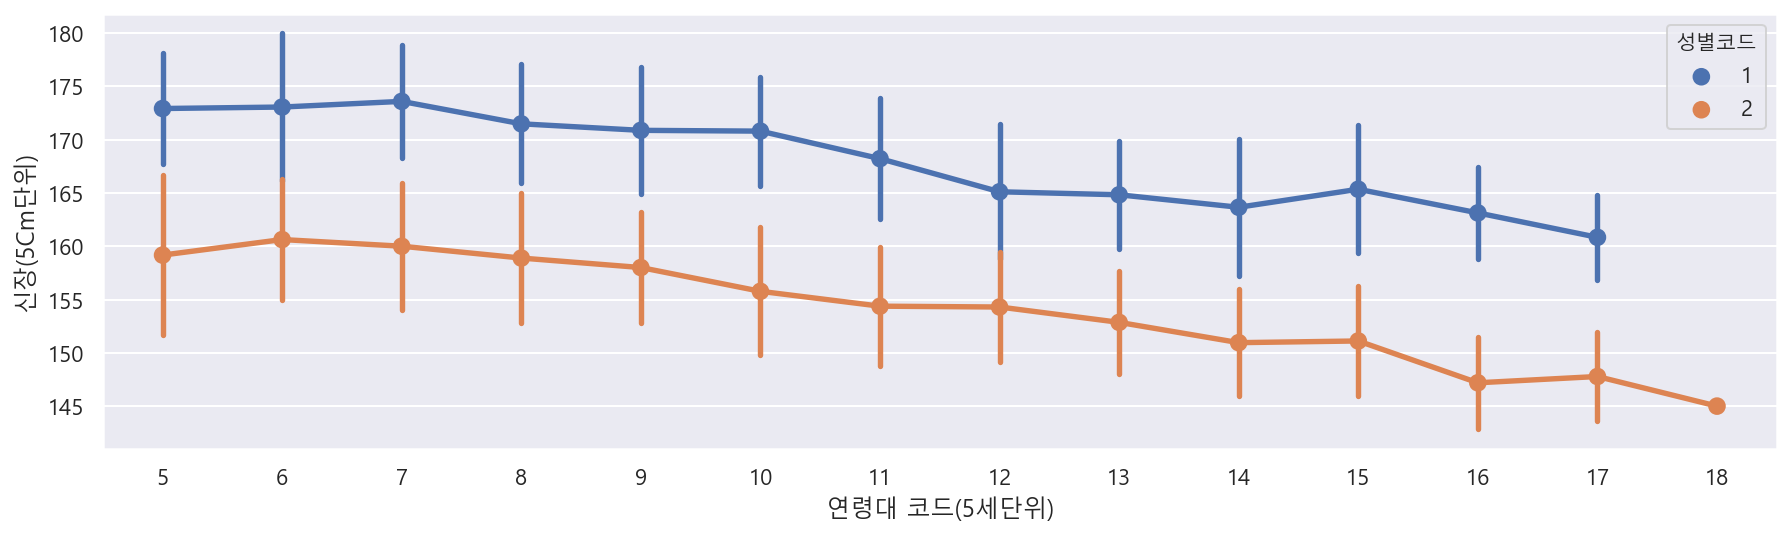

In [91]:
#  연령대코드 (5세단위) 에 따른 신장(5Cm 단위) 을 성별코드에 따라 pointplot으로 그린다
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x='연령대 코드(5세단위)',y='신장(5Cm단위)', hue='성별코드',ci='sd')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

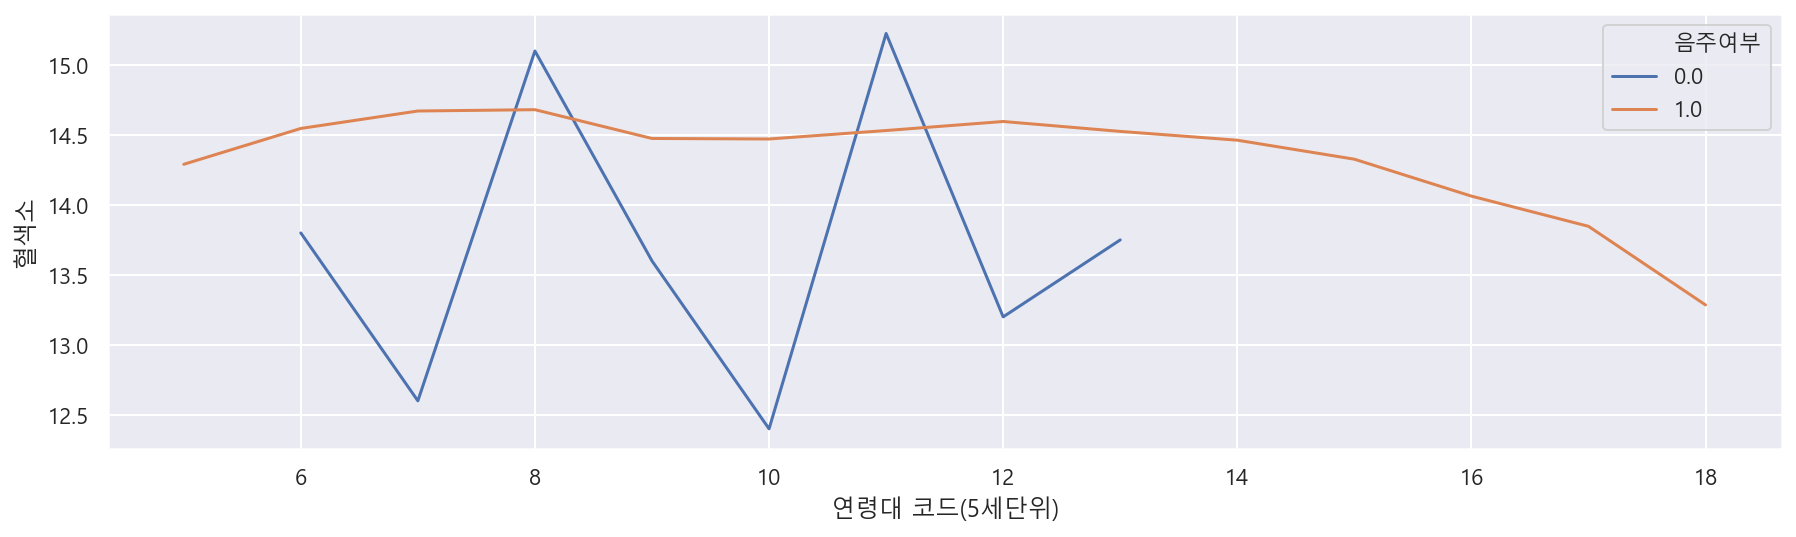

In [94]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그린다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x='연령대 코드(5세단위)', y='혈색소',hue='음주여부',ci=None)

### 14.6 boxplot
#### ● 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
#### ● 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.

#### 1. 최솟값
#### 2. 제 1사분위수
#### 3. 제 2사분위수(), 즉 중앙값
#### 4. 제 3사분위수()
#### 5. 최댓값
#### 6. Box plot 이해하기:


<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

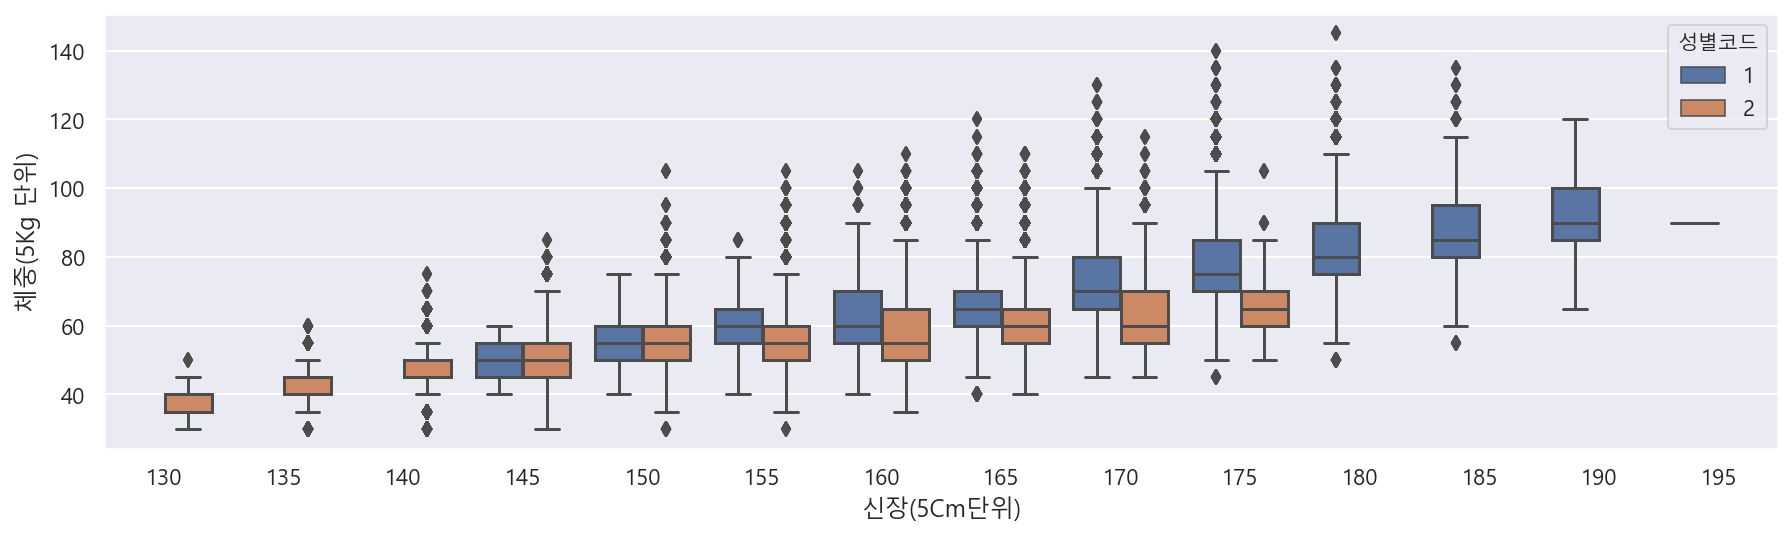

In [99]:
# boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위)을 그리며, 성별코드에 따라 다른 색상으로 표현되게 한다.
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='성별코드')

### 14.7 violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

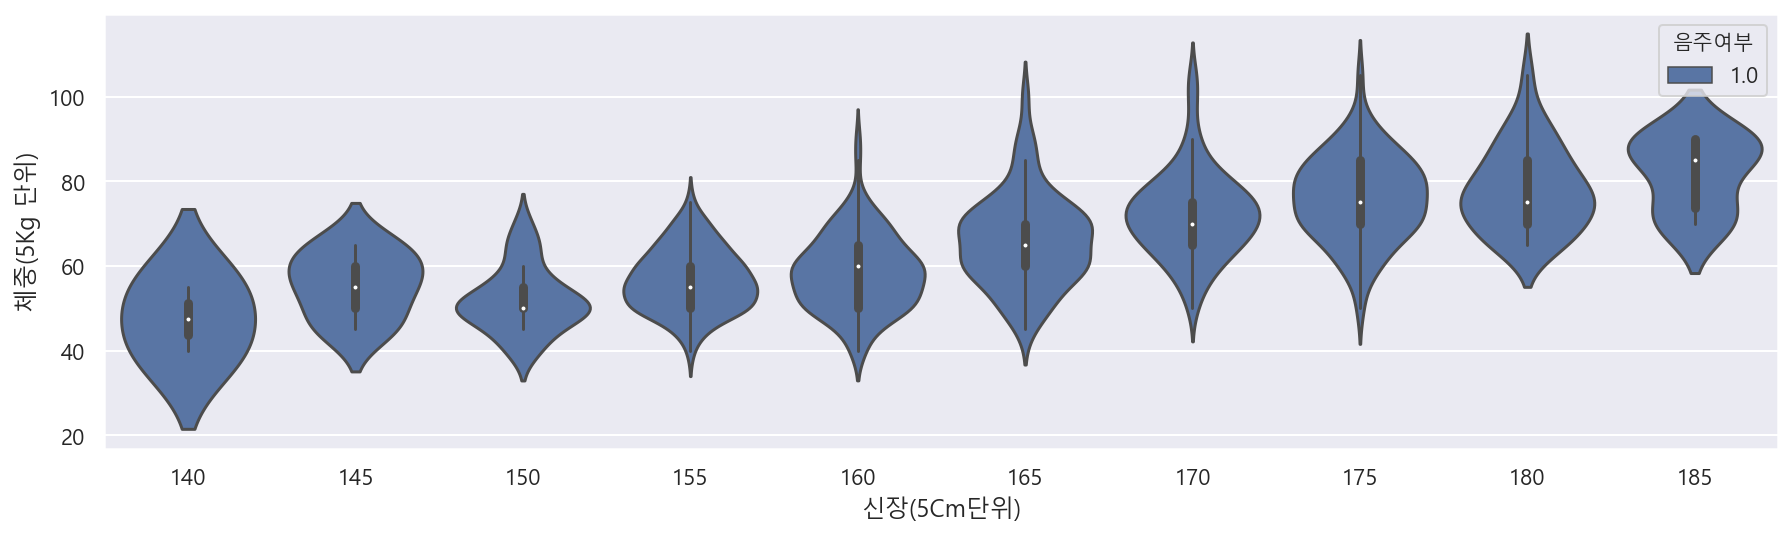

In [103]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 한다.
plt.figure(figsize= (15,4))
sns.violinplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

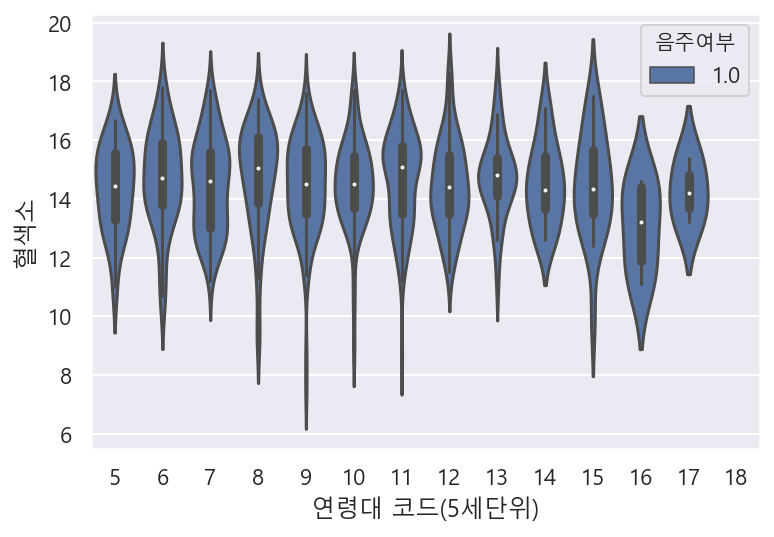

In [107]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현
sns.violinplot(data=df_sample, x='연령대 코드(5세단위)', y='혈색소', hue='음주여부')

### 14.8 swarm plot
#### ● 범주형 데이터를 산점도로 시각화하고자 할 때 사용

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

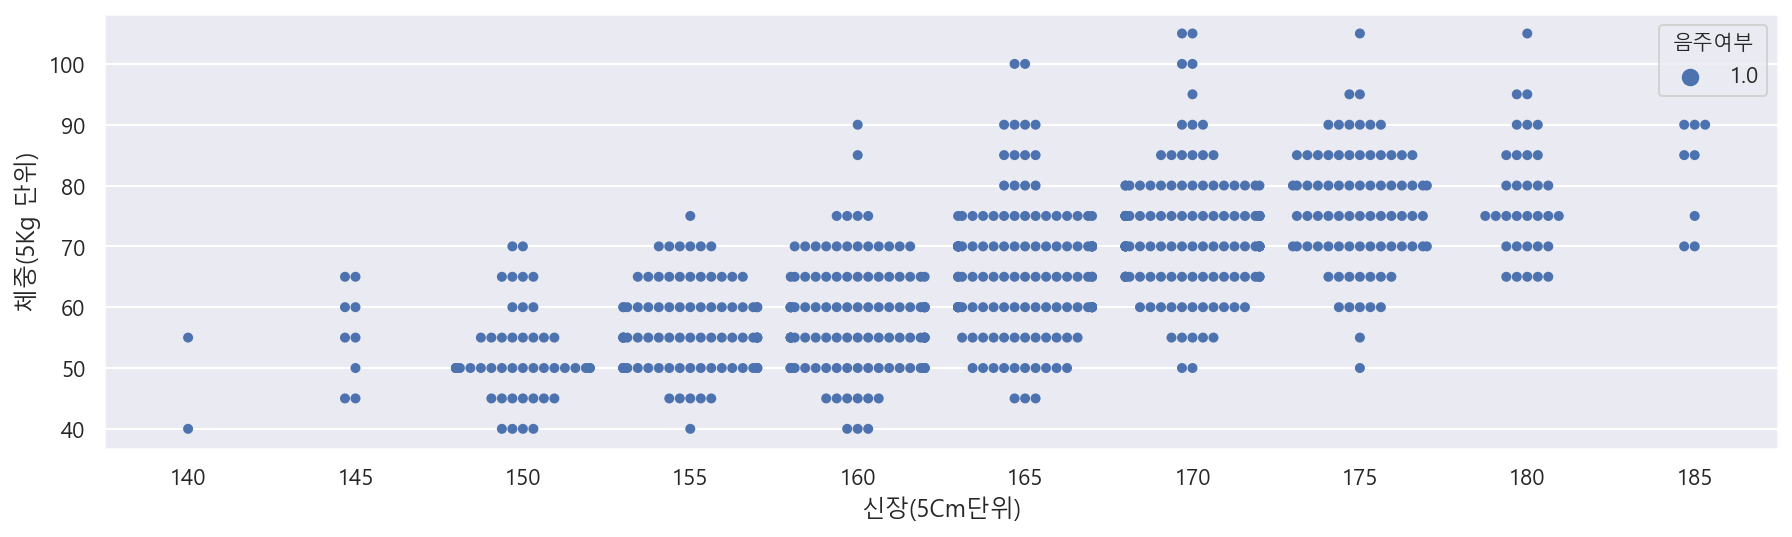

In [110]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 한다.
# 점을 하나씩 찍기 떄문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려본다.

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')


<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

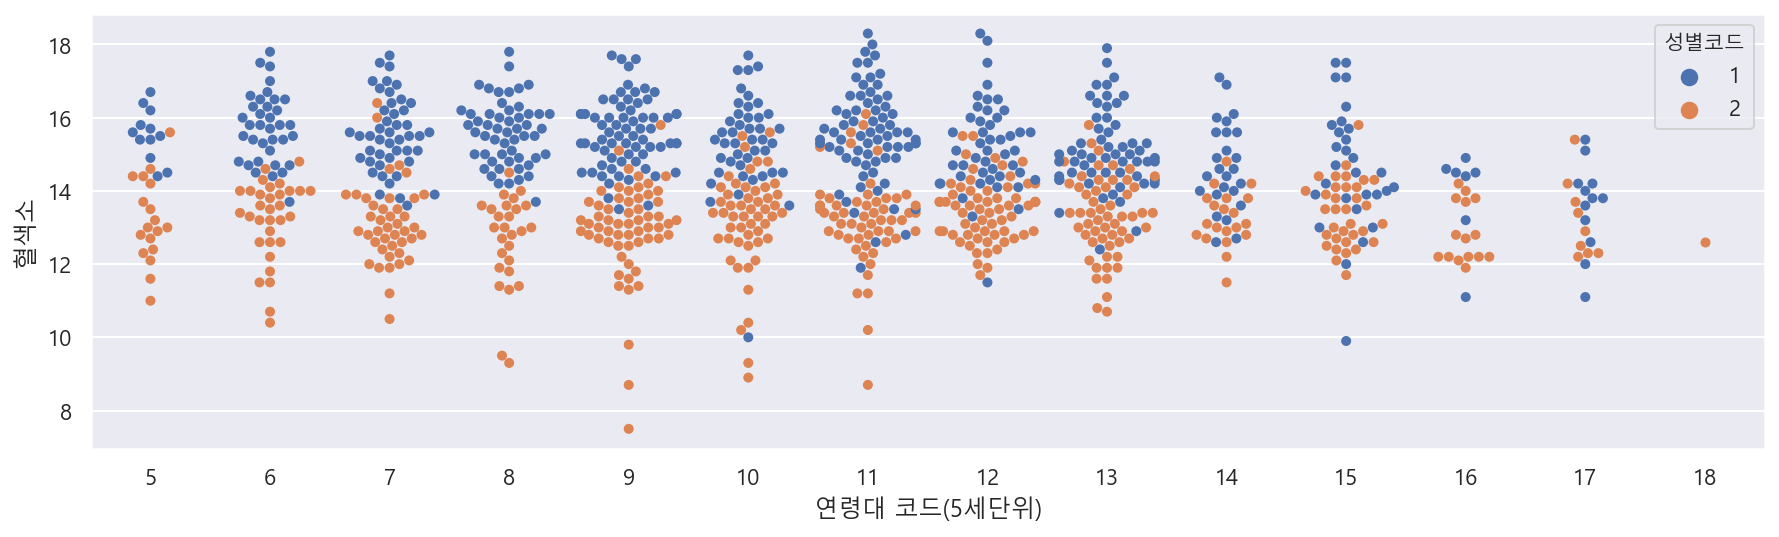

In [114]:
# swarmplot으로 연령대 코드(5세단위)에 따른 음주여부 그리며, 성별코드에 따라 다른 색상으로 표현
# 점을 하나씩 찍기 떄문에 오래 걸리는 코드는 전체로 보기 전에 일부로 표현
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x='연령대 코드(5세단위)', y='혈색소', hue='성별코드')


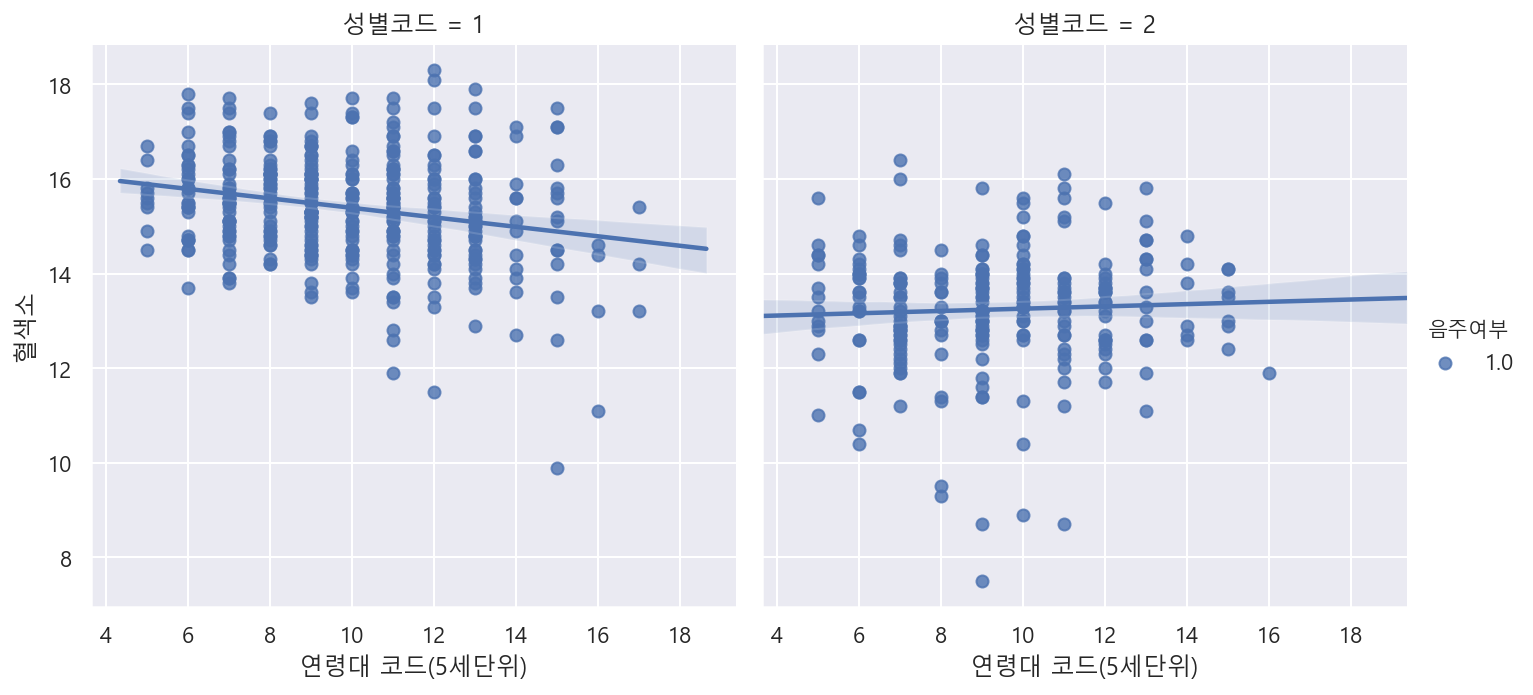

In [117]:
# lmplot 으로 그리기
sns.lmplot(data=df_sample, x='연령대 코드(5세단위)', y='혈색소', hue='음주여부', col='성별코드')

## 15. 수치형 데이터 시각화

### 15.1 scatterplot- 산점도
#### ● 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용
#### ● 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있다

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

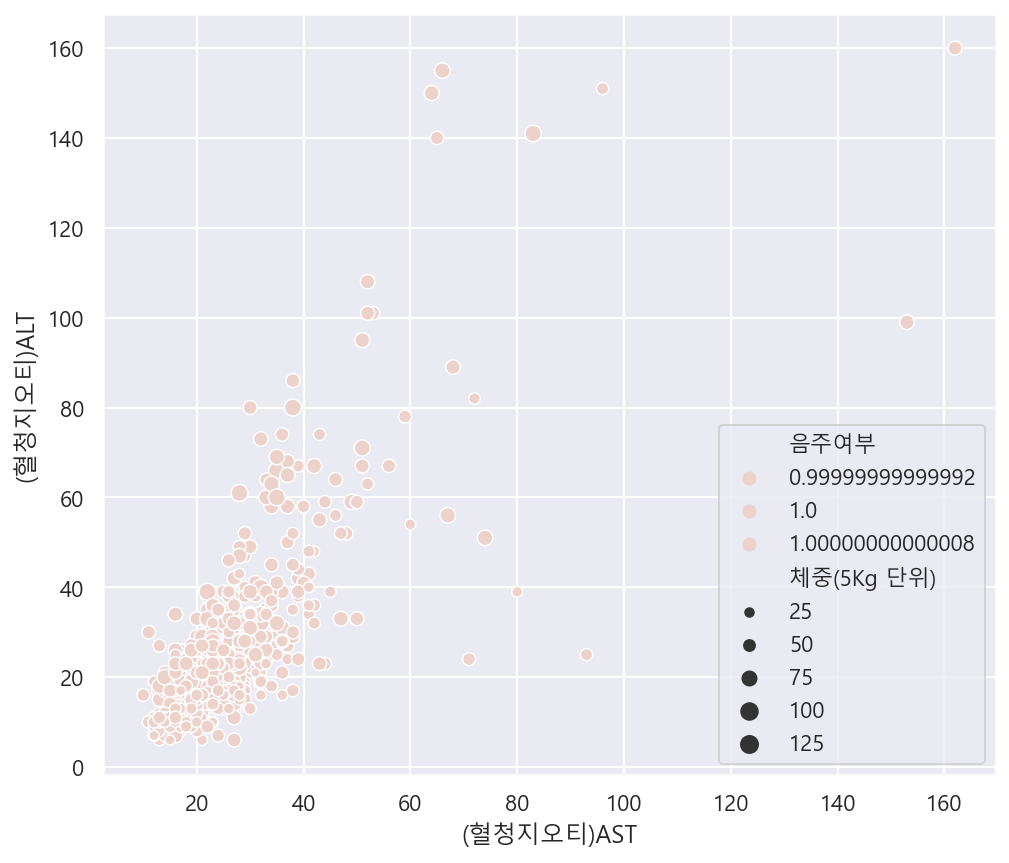

In [126]:
# scatterplot 으로 '(혈청지오티)AST', '(혈청지오티)ALT'을 그리고 음주여부에 따라 다른 색상으로 표현되게 한다.
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',size='체중(5Kg 단위)')

### 15.2 lmplot - 상관 관계를 보기

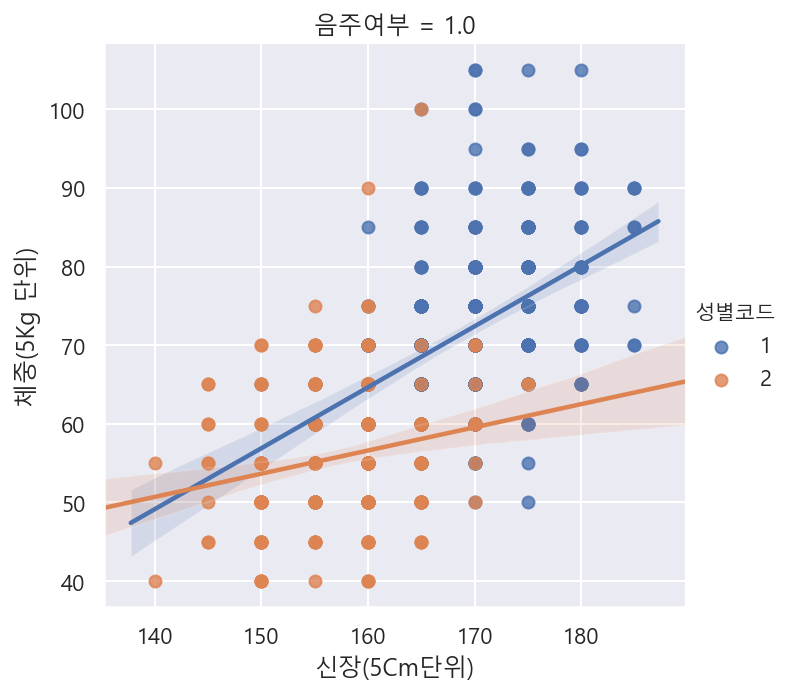

In [130]:
# lmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 한다.
sns.lmplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg 단위)', hue='성별코드',col='음주여부')

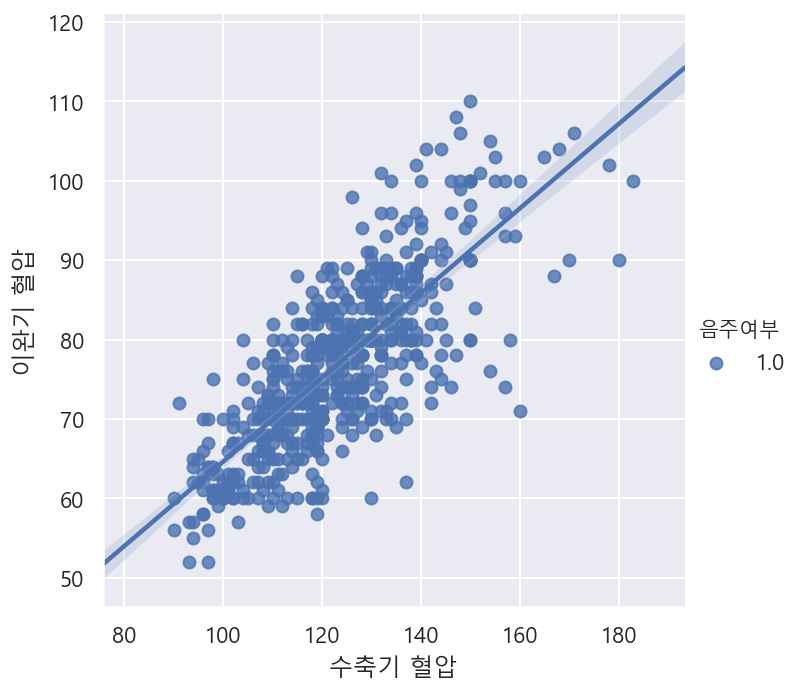

In [133]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려본다.
sns.lmplot(data=df_sample, x='수축기 혈압',y='이완기 혈압', hue='음주여부')

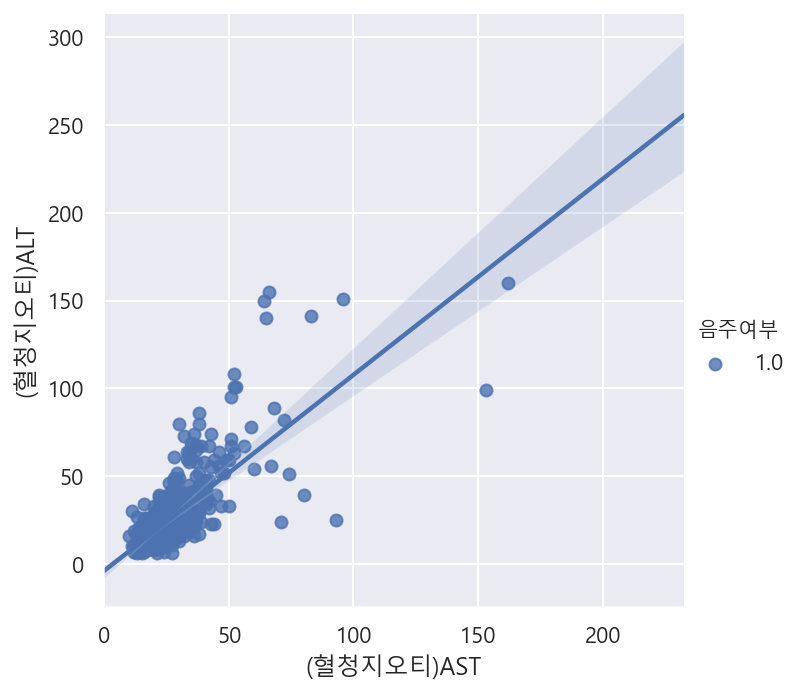

In [136]:
# lmplot 으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 한다,
# robust : 이상치 제외
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT',hue='음주여부',robust=True)

### 15.3 이상치 다루기
#### ● 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 한다.
#### ● 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 한다.

In [138]:
# (혈청지오티)AST 와 (혈청지오티)ALT 가 400 이하인 값만 데이터프레임 형태로 추출헤서
# df_ASLT 라는 변수에 담는다.
df_ASLT = df_sample[(df_sample['(혈청지오티)AST']<400)&(df_sample['(혈청지오티)ALT']<400)]

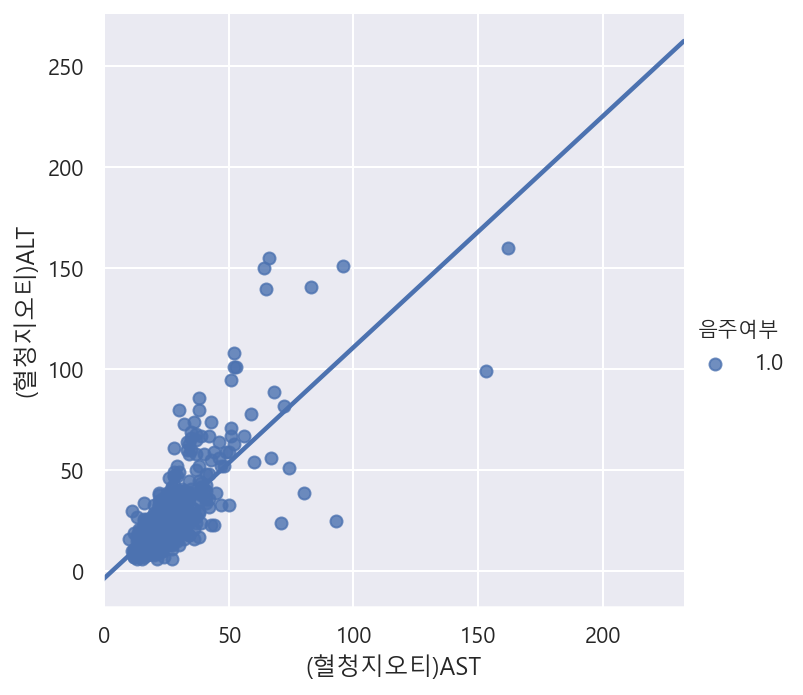

In [143]:
# 이상치를 제거한 '(혈청지오티)AST'와 '(혈청지오티)ALT' 를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [146]:
#'(혈청지오티)AST'와 '(혈청지오티)ALT' 가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high 라는 변수에 담는다
df_ASLT_high = df_sample[(df_sample['(혈청지오티)AST']<400)|(df_sample['(혈청지오티)ALT']<400)]

In [145]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 본다.
df_ASLT_high

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
276826,2019,276827,11,1,11,160,65,86.0,1.2,1.5,...,19.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
849425,2019,849426,26,2,13,155,50,74.6,0.7,1.2,...,43.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
504499,2019,504500,11,2,7,160,45,63.2,1.5,1.5,...,12.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
601054,2019,601055,46,1,8,170,85,89.0,1.2,1.2,...,33.0,1.0,NaN,1,1.0,미시행,미시행,미시행,1.0,20191231
980221,2019,980222,41,1,9,185,75,86.5,1.0,0.5,...,44.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2019,890014,11,1,9,165,75,88.0,1.0,1.0,...,43.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
875389,2019,875390,41,1,6,170,70,79.6,1.0,0.9,...,22.0,1.0,1.0,1,1.0,미시행,미시행,미시행,2.0,20191231
358458,2019,358459,47,1,13,165,65,85.0,1.5,1.2,...,75.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
808228,2019,808229,41,1,10,165,70,84.0,0.8,1.0,...,30.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231


### 15.4 distplot

In [149]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력한다.
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [155]:
df_chol = df[df['총 콜레스테롤'].notnull()]

<AxesSubplot:xlabel='총 콜레스테롤'>

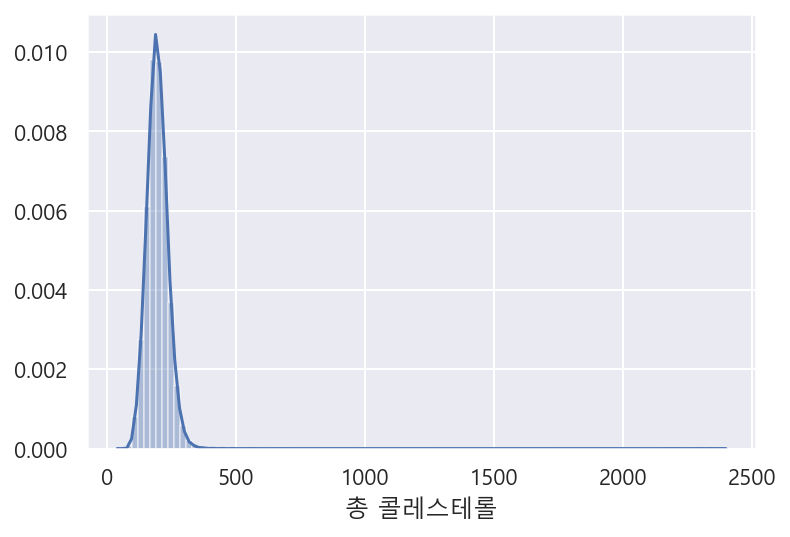

In [160]:
# '총콜레스테롤' 에 따른 distplot 을 그린다.
# distplot은 데이터가 결측치가 있으면 사용할 수 없다.
# distplot은 시리즈 형태의 데이터여야 한다.
sns.distplot(df_chol['총 콜레스테롤'],bins=100)


<AxesSubplot:xlabel='총 콜레스테롤'>

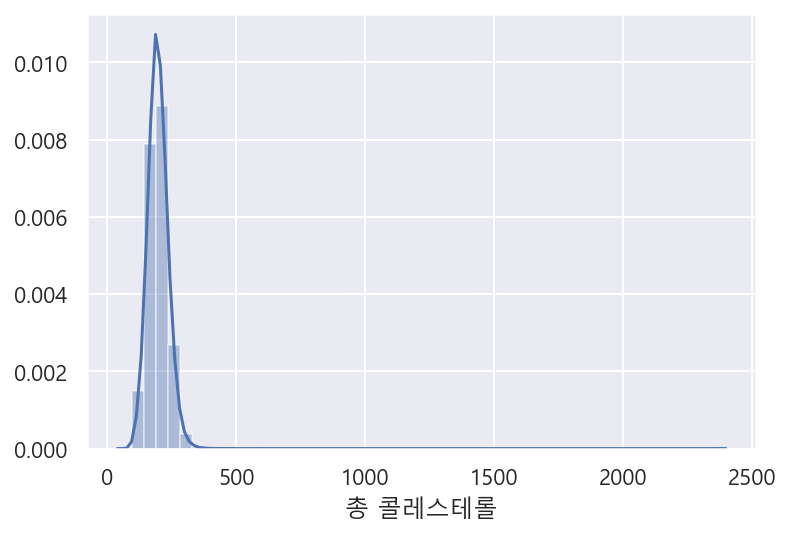

In [164]:
# 음주여부가 1인 값에 대한 '총콜레스테롤'을 distplot 으로 그린다.
sns.distplot(df.loc[df['총 콜레스테롤'].notnull() &(df['음주여부']==1), '총 콜레스테롤'])

<AxesSubplot:xlabel='총 콜레스테롤'>

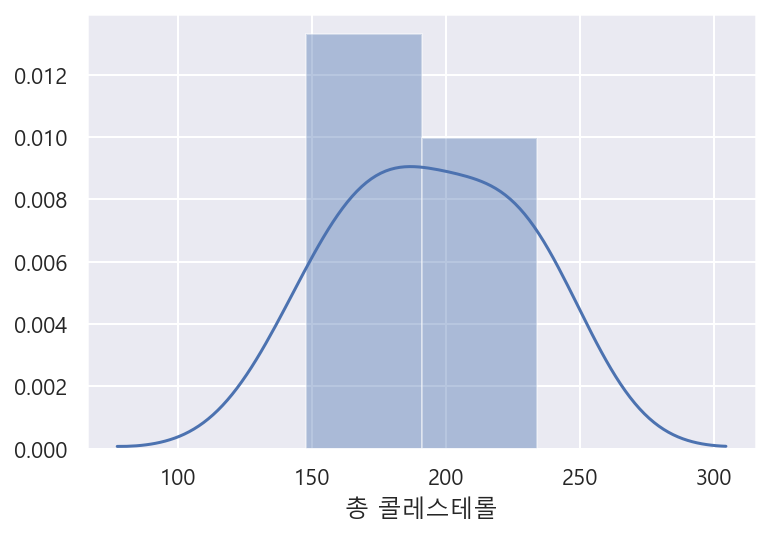

In [165]:
# 음주여부가 0인 값에 대한 '총콜레스테롤'을 distplot 으로 그린다.
sns.distplot(df.loc[df['총 콜레스테롤'].notnull() &(df['음주여부']==0), '총 콜레스테롤'])

<AxesSubplot:xlabel='총 콜레스테롤'>

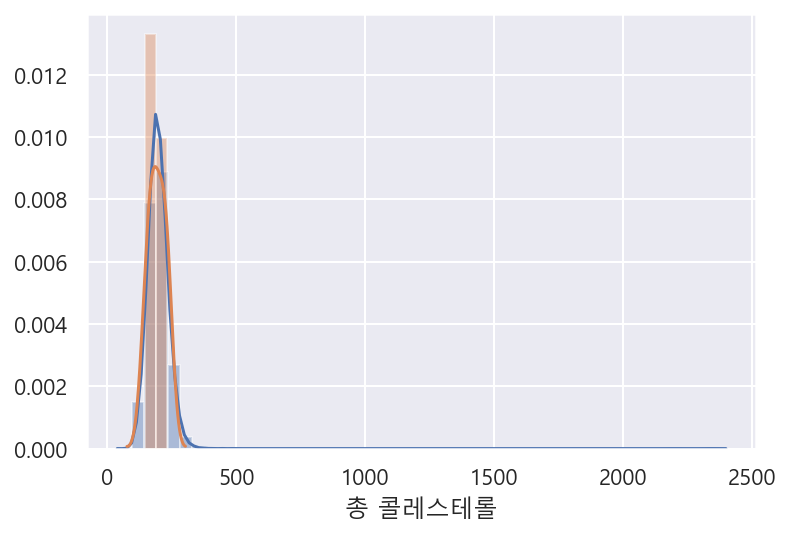

In [166]:
# 음주여부 값에 대한 '총콜레스테롤'을 distplot 으로 그리며, 하나의 그래프에 표시되도록 한다.

sns.distplot(df.loc[df['총 콜레스테롤'].notnull() &(df['음주여부']==1), '총 콜레스테롤'])
sns.distplot(df.loc[df['총 콜레스테롤'].notnull() &(df['음주여부']==0), '총 콜레스테롤'])